En el siguiente Trabajo exploraremos los subsidios a las empresas de colectivos de la RMBA.
Buscaremos relaciones con los diferentes datasets disponibles referidos a:
    - cantidad de pasajeros que trasladan
    - cantidad de líneas que poseen
    - boletos diferenciales de los pasajeros
    - provincias por las que operan
    - municipios por los que operan
Por último utilizaremos modelos de Regresión para intentar predecir estos valores subsidiados con la información disponible

In [1]:
#Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

#### Importamos datos de subsidios

In [2]:
#Importamos el Dataset con información de subsidios al transporte público de pasajeros para colectivos de corta distancia 
data_subsidiosCD=pd.read_csv('aportes_colectivoscd.csv', delimiter=';')
print(data_subsidiosCD.shape)
print("Dataset de subsidios a colectivos de Corta Distancia. La información está por número de cuit.")
print("Están mal asignados los nombres de las columnas")
data_subsidiosCD.tail()

(59332, 6)
Dataset de subsidios a colectivos de Corta Distancia. La información está por número de cuit.
Están mal asignados los nombres de las columnas


,mes,provincia,municipio,cuit,tipo,monto
59327,01/2017,30-71248519-8,TUCUMAN,SAN MIGUEL DE TUCUMAN,3177529.22,Comp. Tarifaria
59328,01/2017,33-54565229-9,TUCUMAN,SAN MIGUEL DE TUCUMAN,2894401.81,Comp. Tarifaria
59329,01/2017,33-54565229-9,TUCUMAN,SAN MIGUEL DE TUCUMAN,434695.65,Comp. Gasoil
59330,01/2017,33-70799632-9,TUCUMAN,SAN MIGUEL DE TUCUMAN,431681.69,Comp. Gasoil
59331,01/2017,33-70799632-9,TUCUMAN,SAN MIGUEL DE TUCUMAN,2714843.56,Comp. Tarifaria


In [3]:
#Ordenamos el nombre de las columnas
data_subsidiosCD.columns = ['periodo','cuit','provincia','municipio','monto','tipo subsidio']
data_subsidiosCD.tail()

,periodo,cuit,provincia,municipio,monto,tipo subsidio
59327,01/2017,30-71248519-8,TUCUMAN,SAN MIGUEL DE TUCUMAN,3177529.22,Comp. Tarifaria
59328,01/2017,33-54565229-9,TUCUMAN,SAN MIGUEL DE TUCUMAN,2894401.81,Comp. Tarifaria
59329,01/2017,33-54565229-9,TUCUMAN,SAN MIGUEL DE TUCUMAN,434695.65,Comp. Gasoil
59330,01/2017,33-70799632-9,TUCUMAN,SAN MIGUEL DE TUCUMAN,431681.69,Comp. Gasoil
59331,01/2017,33-70799632-9,TUCUMAN,SAN MIGUEL DE TUCUMAN,2714843.56,Comp. Tarifaria


In [4]:
#¿Cuántos CUITs unicos tenemos en el dataset aportes_colectivoscd?
cuits_subsidiosCD=len(data_subsidiosCD['cuit'].unique())
print(f'Tenemos datos de {cuits_subsidiosCD} cuits únicos en SubsidiosCD')

Tenemos datos de 959 cuits únicos en SubsidiosCD


In [5]:
#Extraemos año y mes

data_subsidiosCD['periodo'] = data_subsidiosCD['periodo'].apply(lambda x: x.replace('/', '-') if '/' in str(x) else x)

In [6]:
data_subsidiosCD.periodo = pd.to_datetime(data_subsidiosCD.periodo)
data_subsidiosCD['año'] = data_subsidiosCD.periodo.dt.year
data_subsidiosCD['mes_correcto'] = data_subsidiosCD.periodo.dt.month
data_subsidiosCD.head()

,periodo,cuit,provincia,municipio,monto,tipo subsidio,año,mes_correcto
0,2019-05-01,30-64701983-4,BUENOS AIRES,ALMIRANTE BROWN,748000.00,Comp. Gasoil,2019,5
1,2019-05-01,30-64701983-4,BUENOS AIRES,ALMIRANTE BROWN,3830707.20,Comp. Tarifaria,2019,5
2,2019-05-01,30-65080001-6,BUENOS AIRES,ALMIRANTE BROWN,2770000.00,Comp. Gasoil,2019,5
3,2019-05-01,30-65080001-6,BUENOS AIRES,ALMIRANTE BROWN,12314955.62,Comp. Tarifaria,2019,5
4,2019-05-01,30-68586179-4,BUENOS AIRES,ALMIRANTE BROWN,10246280.12,Comp. Tarifaria,2019,5


In [7]:
#Tabla pivote para visualizar los subsidios asginados por provincia año a año

pd.pivot_table(data_subsidiosCD,index=["año","provincia"],values=["monto"],columns=["tipo subsidio"], aggfunc=np.sum, margins=True, fill_value=0)

monto                              
tipo subsidio             Comp. Gasoil Comp. Tarifaria           All
año  provincia                                                      
2017 BUENOS AIRES         2.417959e+09    1.585488e+10  1.827284e+10
     C.A.B.A.             2.637860e+09    1.776952e+10  2.040738e+10
     CATAMARCA            4.622142e+07    2.102689e+08  2.564904e+08
     CHACO                7.898531e+07    3.913246e+08  4.703099e+08
     CHUBUT               5.754670e+07    2.958575e+08  3.534041e+08
     CORDOBA              5.856110e+08    2.399199e+09  2.984810e+09
     CORRIENTES           9.319315e+07    3.793238e+08  4.725169e+08
     ENTRE RIOS           1.009970e+08    4.831937e+08  5.841906e+08
     FORMOSA              1.826940e+07    9.372692e+07  1.119963e+08
     JN                   6.503445e+07    4.427994e+08  5.078338e+08
     JUJUY                1.542312e+08    6.930816e+08  8.473127e+08
     LA PAMPA             1.403824e+07    6.046006e+07  7.449831e+07
     LA RIOJA             3.109168e+07    9.094785e+07  1.220395e+08
     MENDOZA              3.143098e+08    1.575384e+09  1.889694e+09
     MISIONES             1.842369e+08    6.253787e+08  8.096156e+08
     NEUQUEN              6.251832e+07    2.681274e+08  3.306457e+08
     RIO NEGRO            4.469826e+07    2.309640e+08  2.756622e+08
     SALTA                1.776067e+08    8.523317e+08  1.029938e+09
     SAN JUAN             1.188038e+08    5.732231e+08  6.920269e+08
     SAN LUIS             4.823710e+07    2.502070e+08  2.984441e+08
     SANTA CRUZ           7.734306e+06    3.239560e+07  4.012990e+07
     SANTA FE             4.561389e+08    2.035582e+09  2.491721e+09
     SANTIAGO DEL ESTERO  8.604476e+07    4.530824e+08  5.391271e+08
     TIERRA DEL FUEGO     5.142923e+06    1.455247e+07  1.969539e+07
     TUCUMAN              2.535819e+08    1.348445e+09  1.602027e+09
2018 BUENOS AIRES         4.194541e+09    1.992855e+10  2.412309e+10
     C.A.B.A.             4.595287e+09    2.159631e+10  2.619160e+10
     CATAMARCA            7.830128e+07    2.841051e+08  3.624063e+08
     CHACO                1.219608e+08    4.878686e+08  6.098294e+08
     CHUBUT               9.152650e+07    3.617256e+08  4.532521e+08
...                                ...             ...           ...
     SANTA FE             7.843429e+08    2.523019e+09  3.307362e+09
     SANTIAGO DEL ESTERO  1.395691e+08    5.203104e+08  6.598795e+08
     TIERRA DEL FUEGO     9.874645e+06    4.993358e+07  5.980823e+07
     TUCUMAN              4.210141e+08    1.488595e+09  1.909609e+09
2019 BUENOS AIRES         1.997922e+09    9.074282e+09  1.107220e+10
     C.A.B.A.             2.417416e+09    1.066192e+10  1.307933e+10
     CATAMARCA            0.000000e+00    2.635474e+07  2.635474e+07
     CHACO                0.000000e+00    3.224025e+07  3.224025e+07
     CHUBUT               0.000000e+00    1.395541e+07  1.395541e+07
     CORDOBA              0.000000e+00    1.378026e+05  1.378026e+05
     CORRIENTES           0.000000e+00    2.924369e+07  2.924369e+07
     ENTRE RIOS           0.000000e+00    2.319695e+07  2.319695e+07
     FORMOSA              0.000000e+00    2.061904e+07  2.061904e+07
     JN                   6.928200e+07    2.577143e+08  3.269963e+08
     JUJUY                0.000000e+00    7.493812e+07  7.493812e+07
     LA PAMPA             0.000000e+00    1.673749e+06  1.673749e+06
     LA RIOJA             0.000000e+00    0.000000e+00  0.000000e+00
     MENDOZA              0.000000e+00    0.000000e+00  0.000000e+00
     MISIONES             0.000000e+00    0.000000e+00  0.000000e+00
     NEUQUEN              0.000000e+00    3.222339e+07  3.222339e+07
     RIO NEGRO            0.000000e+00    2.880517e+07  2.880517e+07
     SALTA                0.000000e+00    0.000000e+00  0.000000e+00
     SAN JUAN             0.000000e+00    1.560100e+08  1.560100e+08
     SAN LUIS             0.000000e+00    5.037300e+06  5.037300e+06
     SANTA CRUZ           0.000

In [8]:
#Tenemos info de 2017 a 2019
data_subsidiosCD['año'].unique()

array([2019, 2018, 2017])

In [9]:
# Queremos ver a qué provincia/s se asignaron mas subsidios en el período 2017-2019

data_subsidiosCD_prov = data_subsidiosCD.groupby(["provincia"])["monto"].sum().sort_values(ascending=False)
pd.DataFrame(data_subsidiosCD_prov)

,monto
provincia,
C.A.B.A.,5.967831e+10
BUENOS AIRES,5.346813e+10
CORDOBA,6.739376e+09
SANTA FE,5.930631e+09
MENDOZA,4.204203e+09
TUCUMAN,3.511636e+09
SALTA,2.288816e+09
JUJUY,2.112887e+09
SAN JUAN,2.045761e+09


Subsidios por provincia


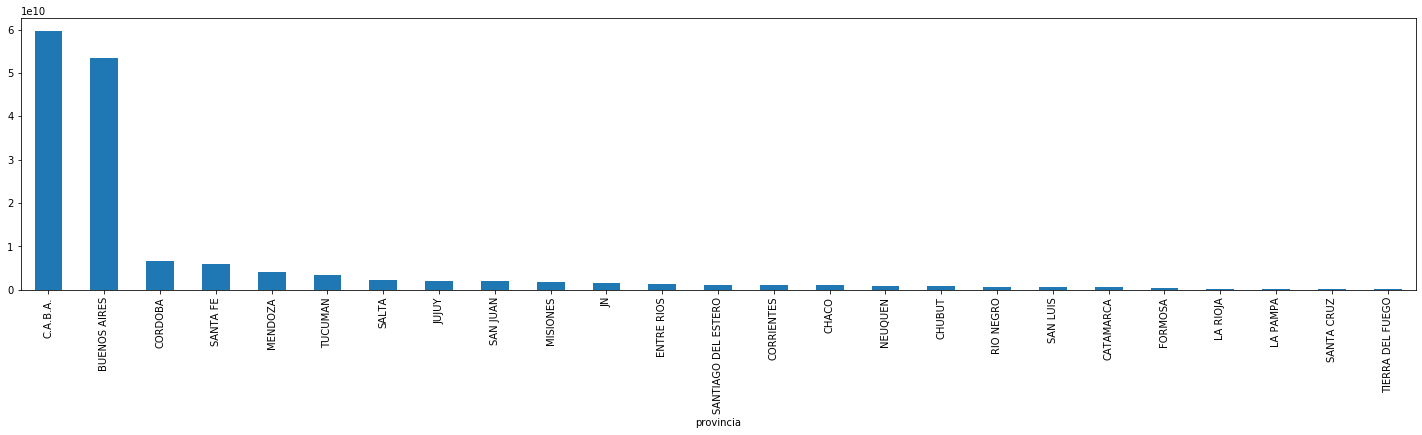

In [10]:
#Vemos que en el período seleccionado, los subsidios asignados a CABA y BSAS son mucho mayores a cualquier otra provincia

data_subsidiosCD_prov.plot.bar(figsize=(25,5))
print("Subsidios por provincia")

#### Filtramos los SUBSIDIOS para CABA + Buenos Aires

In [11]:
data_subsidiosCD_BA=data_subsidiosCD.loc[(data_subsidiosCD.provincia=='C.A.B.A.') | (data_subsidiosCD.provincia=='BUENOS AIRES')]
print(data_subsidiosCD_BA.shape)
data_subsidiosCD_BA.head()

(21511, 8)


,periodo,cuit,provincia,municipio,monto,tipo subsidio,año,mes_correcto
0,2019-05-01,30-64701983-4,BUENOS AIRES,ALMIRANTE BROWN,748000.00,Comp. Gasoil,2019,5
1,2019-05-01,30-64701983-4,BUENOS AIRES,ALMIRANTE BROWN,3830707.20,Comp. Tarifaria,2019,5
2,2019-05-01,30-65080001-6,BUENOS AIRES,ALMIRANTE BROWN,2770000.00,Comp. Gasoil,2019,5
3,2019-05-01,30-65080001-6,BUENOS AIRES,ALMIRANTE BROWN,12314955.62,Comp. Tarifaria,2019,5
4,2019-05-01,30-68586179-4,BUENOS AIRES,ALMIRANTE BROWN,10246280.12,Comp. Tarifaria,2019,5


#### Filtramos el dataset para quedarnos sólo con los municipios de RMBA

In [12]:
municipiosRMBA=['ALMIRANTE BROWN', 'AVELLANEDA', 'BERAZATEGUI',
       'BRANDSEN', 'CAMPANA', 'CAÑUELAS', 'ESCOBAR', 'ESTEBAN ECHEVERRIA',
       'EXALTACION DE LA CRUZ', 'EZEIZA', 'FLORENCIO VARELA', 'GENERAL RODRIGUEZ', 'GENERAL SAN MARTIN',
       'ITUZAINGO', 'JOSE C. PAZ', 'LA MATANZA', 'LA PLATA', 'LANUS', 'LOMAS DE ZAMORA', 'LUJAN', 'MALVINAS ARGENTINAS', 'MERLO', 'MORENO', 'MORON', 'PILAR', 'PROV', 'QUILMES',
       'SAN FERNANDO', 'SAN ISIDRO', 'SAN MIGUEL', 'SAN VICENTE', 'TIGRE', 'ZARATE', 'C.A.B.A.']

In [13]:
rowscorrectas=data_subsidiosCD_BA.municipio.isin(municipiosRMBA)

In [14]:
data_subsidiosCD_BA = data_subsidiosCD_BA[rowscorrectas]

In [15]:
data_subsidiosCD_BA

,periodo,cuit,provincia,municipio,monto,tipo subsidio,año,mes_correcto
0,2019-05-01,30-64701983-4,BUENOS AIRES,ALMIRANTE BROWN,748000.00,Comp. Gasoil,2019,5
1,2019-05-01,30-64701983-4,BUENOS AIRES,ALMIRANTE BROWN,3830707.20,Comp. Tarifaria,2019,5
2,2019-05-01,30-65080001-6,BUENOS AIRES,ALMIRANTE BROWN,2770000.00,Comp. Gasoil,2019,5
3,2019-05-01,30-65080001-6,BUENOS AIRES,ALMIRANTE BROWN,12314955.62,Comp. Tarifaria,2019,5
4,2019-05-01,30-68586179-4,BUENOS AIRES,ALMIRANTE BROWN,10246280.12,Comp. Tarifaria,2019,5
5,2019-05-01,30-68586179-4,BUENOS AIRES,ALMIRANTE BROWN,2480000.00,Comp. Gasoil,2019,5
6,2019-05-01,30-71596259-0,BUENOS AIRES,ALMIRANTE BROWN,7303478.57,Comp. Tarifaria,2019,5
7,2019-05-01,30-71596259-0,BUENOS AIRES,ALMIRANTE BROWN,1980000.00,Comp. Gasoil,2019,5
8,2019-05-01,33-54634565-9,BUENOS AIRES,ALMIRANTE BROWN,450000.00,Comp. Gasoil,2019,5
9,2019-05-01,33-54634565-9,BUENOS AIRES,ALMIRANTE BROWN,1166610.15,Comp. Tarifaria,2019,5


In [16]:
print(f'Pasamos de tener {data_subsidiosCD.shape[0]} filas, a tener {data_subsidiosCD_BA.shape[0]} filas')

Pasamos de tener 59332 filas, a tener 19038 filas


In [17]:
#cantidad de cuits unicos para CABA + BSAS en el dataset de subsidios
len(data_subsidiosCD_BA['cuit'].unique())

293

In [18]:
#Tabla pivote para ver la evolución de los subsidios en CABA + BSAS

subisidiosCD_tipo_BA = pd.pivot_table(data_subsidiosCD_BA,values = 'monto',columns = 'tipo subsidio', index = data_subsidiosCD_BA.periodo.values, aggfunc = np.sum, fill_value=0)
subisidiosCD_tipo_BA

tipo subsidio,Comp. Gasoil,Comp. Tarifaria
2017-01-01,3.391521e+08,2.502854e+09
2017-02-01,3.195655e+08,2.499866e+09
2017-03-01,3.867270e+08,2.438821e+09
2017-04-01,3.409379e+08,2.483771e+09
2017-05-01,3.706402e+08,2.479680e+09
2017-06-01,3.506367e+08,3.395322e+09
2017-07-01,4.154374e+08,2.541034e+09
2017-08-01,4.057660e+08,2.539958e+09
2017-09-01,4.152141e+08,2.545177e+09
2017-10-01,4.879704e+08,2.633498e+09


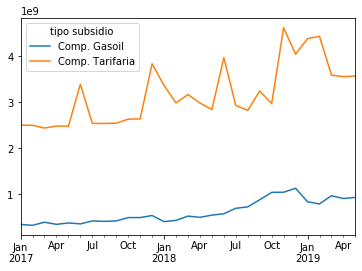

In [19]:
# Evolución de los subsidios en el período 2017-2019 para CABA + BSAS
# Pico en diciembre '18
subisidiosCD_tipo_BA.plot()

In [20]:
# Subsidios totales por año para empresas de CABA y BSAS, mostrados por cuit
subisidiosCD_tipo_BA_cuit = pd.pivot_table(data_subsidiosCD_BA,values = 'monto',columns = 'año', index = data_subsidiosCD_BA.cuit.values, aggfunc = np.sum, fill_value=0)
subisidiosCD_tipo_BA_cuit.head(20)

año,2017,2018,2019
20-01143816-5,2.627922e+06,2.625314e+06,0.000000e+00
20-06606872-3,0.000000e+00,0.000000e+00,0.000000e+00
20-06956154-4,0.000000e+00,0.000000e+00,0.000000e+00
20-07815485-4,0.000000e+00,0.000000e+00,0.000000e+00
20-08140678-3,0.000000e+00,0.000000e+00,0.000000e+00
20-13164214-9,0.000000e+00,0.000000e+00,0.000000e+00
23-13418186-9,0.000000e+00,0.000000e+00,0.000000e+00
30-51755171-2,0.000000e+00,0.000000e+00,0.000000e+00
30-52276217-9,8.945585e+08,1.139292e+09,5.468153e+08
30-53313348-3,0.000000e+00,0.000000e+00,0.000000e+00


#### Importamos el dataset de SISTAU, que utilizaremos para asignarle la razón social a todos estos cuits

In [21]:
# Importamos dataset de subsidios de SISTAU (Sistema Integrado del Transporte Automotor)
# Lo utilizaremos para conocer a qué razón social pertenece cada cuit
sistau=pd.read_csv('sistau_sistau.csv', delimiter=';')
print(sistau.shape)
print("Dataset SISTAU")
sistau.head()

(58456, 7)
Dataset SISTAU


,mes,provincia,municipio,cuit,razon_social,pago,monto
0,12/2017,BUENOS AIRES,ALMIRANTE BROWN,30-64701983-4,TRANSPORTE DEL SUR SRL,SISTAU AMBA PAGO 1,563562.23
1,12/2017,BUENOS AIRES,ALMIRANTE BROWN,30-64701983-4,TRANSPORTE DEL SUR SRL,SISTAU AMBA PAGO 2,0.00
2,12/2017,BUENOS AIRES,ALMIRANTE BROWN,30-64701983-4,TRANSPORTE DEL SUR SRL,SISTAU AMBA PAGO 3,0.00
3,12/2017,BUENOS AIRES,ALMIRANTE BROWN,30-64701983-4,TRANSPORTE DEL SUR SRL,SISTAU AMBA PAGO 4,0.00
4,12/2017,BUENOS AIRES,ALMIRANTE BROWN,30-64701983-4,TRANSPORTE DEL SUR SRL,SISTAU AMBA PAGO 5,16188.82


In [22]:
cuits_SISTAU=len(sistau['cuit'].unique())
print(f'Tenemos datos de {cuits_SISTAU} cuits únicos en SISTAU')

Tenemos datos de 742 cuits únicos en SISTAU


In [23]:
# Este dataset tiene información desde Julio'17 a Junio'18
sistau['mes'].unique()

array(['12/2017', '11/2017', '10/2017', '09/2017', '08/2017', '07/2017',
       '06/2018', '06/2017', '05/2018', '04/2018', '03/2018', '02/2018',
       '01/2018'], dtype=object)

In [24]:
#Nos quedamos sólo con las columnas CUIT y RAZON_SOCIAL de SISTAU
sistau_drop = sistau.drop(['pago', 'mes','provincia','municipio','monto'], axis=1)
print(sistau_drop.shape)
sistau_drop.head(10)

(58456, 2)


,cuit,razon_social
0,30-64701983-4,TRANSPORTE DEL SUR SRL
1,30-64701983-4,TRANSPORTE DEL SUR SRL
2,30-64701983-4,TRANSPORTE DEL SUR SRL
3,30-64701983-4,TRANSPORTE DEL SUR SRL
4,30-64701983-4,TRANSPORTE DEL SUR SRL
5,30-65080001-6,EMPRESA DE TRANSPORTE DEL SUR SRL
6,30-65080001-6,EMPRESA DE TRANSPORTE DEL SUR SRL
7,30-65080001-6,EMPRESA DE TRANSPORTE DEL SUR SRL
8,30-65080001-6,EMPRESA DE TRANSPORTE DEL SUR SRL
9,30-65080001-6,EMPRESA DE TRANSPORTE DEL SUR SRL


In [25]:
#Eliminamos duplicados y nos quedamos con una lista de 742 cuits únicos (coincide) con su correspondiente razon social
sistau_drop.drop_duplicates(subset='cuit', inplace=True,keep='first')
print(sistau_drop.shape)
sistau_drop.head(10)

(742, 2)


,cuit,razon_social
0,30-64701983-4,TRANSPORTE DEL SUR SRL
5,30-65080001-6,EMPRESA DE TRANSPORTE DEL SUR SRL
10,30-68586179-4,EMPRESA 501 S.A.
15,33-54634565-9,EXPRESO VILLA GALICIA SAN JOSE S.A.
20,33-62074555-9,EXPRESO ARSENO S.R.L
25,30-71042603-8,TRANSPORTE MD S.A.
32,33-54661071-9,GENERAL TOMAS GUIDO S.A.C.I.F.
37,30-64940711-4,TRANSPORTES LA UNION SRL
44,20-17896617-1,"LANGE, DANTE RAÚL"
51,30-54634701-6,LEMOS & RODRIGUEZ S.A.


In [26]:
#Creamos un nuevo dataset incorporando la razon_social (que traemos de SISTAU) a Subsidios CD, lo llamamos results5
results5= pd.merge(data_subsidiosCD, sistau_drop, how='left',left_on='cuit', right_on='cuit')
print(results5.shape)
results5.head(15)

(59332, 9)


,periodo,cuit,provincia,municipio,monto,tipo subsidio,año,mes_correcto,razon_social
0,2019-05-01,30-64701983-4,BUENOS AIRES,ALMIRANTE BROWN,748000.00,Comp. Gasoil,2019,5,TRANSPORTE DEL SUR SRL
1,2019-05-01,30-64701983-4,BUENOS AIRES,ALMIRANTE BROWN,3830707.20,Comp. Tarifaria,2019,5,TRANSPORTE DEL SUR SRL
2,2019-05-01,30-65080001-6,BUENOS AIRES,ALMIRANTE BROWN,2770000.00,Comp. Gasoil,2019,5,EMPRESA DE TRANSPORTE DEL SUR SRL
3,2019-05-01,30-65080001-6,BUENOS AIRES,ALMIRANTE BROWN,12314955.62,Comp. Tarifaria,2019,5,EMPRESA DE TRANSPORTE DEL SUR SRL
4,2019-05-01,30-68586179-4,BUENOS AIRES,ALMIRANTE BROWN,10246280.12,Comp. Tarifaria,2019,5,EMPRESA 501 S.A.
5,2019-05-01,30-68586179-4,BUENOS AIRES,ALMIRANTE BROWN,2480000.00,Comp. Gasoil,2019,5,EMPRESA 501 S.A.
6,2019-05-01,30-71596259-0,BUENOS AIRES,ALMIRANTE BROWN,7303478.57,Comp. Tarifaria,2019,5,NaN
7,2019-05-01,30-71596259-0,BUENOS AIRES,ALMIRANTE BROWN,1980000.00,Comp. Gasoil,2019,5,NaN
8,2019-05-01,33-54634565-9,BUENOS AIRES,ALMIRANTE BROWN,450000.00,Comp. Gasoil,2019,5,EXPRESO VILLA GALICIA SAN JOSE S.A.
9,2019-05-01,33-54634565-9,BUENOS AIRES,ALMIRANTE BROWN,1166610.15,Comp. Tarifaria,2019,5,EXPRESO VILLA GALICIA SAN JOSE S.A.


In [27]:
#¿Tenemos NaNs? Sí, en razón_social porque no se encontraron esos cuits en el dataset SISTAU
results5.isnull().any()

periodo          False
cuit             False
provincia        False
municipio        False
monto            False
tipo subsidio    False
año              False
mes_correcto     False
razon_social      True
dtype: bool

In [28]:
total = results5.isnull().sum().sort_values(ascending=False)
percent = (results5.isnull().sum()/results5.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(13)

,Total,Percent
razon_social,6286,0.105946
mes_correcto,0,0.000000
año,0,0.000000
tipo subsidio,0,0.000000
monto,0,0.000000
municipio,0,0.000000
provincia,0,0.000000
cuit,0,0.000000
periodo,0,0.000000


In [29]:
# Hacemos lo mismo pero partiendo del dataframe de CABA + Buenos Aires, lo nombramos results6
results6= pd.merge(data_subsidiosCD_BA, sistau_drop, how='left',left_on='cuit', right_on='cuit')
print(results6.shape)
results6.head(8)

(19038, 9)


,periodo,cuit,provincia,municipio,monto,tipo subsidio,año,mes_correcto,razon_social
0,2019-05-01,30-64701983-4,BUENOS AIRES,ALMIRANTE BROWN,748000.00,Comp. Gasoil,2019,5,TRANSPORTE DEL SUR SRL
1,2019-05-01,30-64701983-4,BUENOS AIRES,ALMIRANTE BROWN,3830707.20,Comp. Tarifaria,2019,5,TRANSPORTE DEL SUR SRL
2,2019-05-01,30-65080001-6,BUENOS AIRES,ALMIRANTE BROWN,2770000.00,Comp. Gasoil,2019,5,EMPRESA DE TRANSPORTE DEL SUR SRL
3,2019-05-01,30-65080001-6,BUENOS AIRES,ALMIRANTE BROWN,12314955.62,Comp. Tarifaria,2019,5,EMPRESA DE TRANSPORTE DEL SUR SRL
4,2019-05-01,30-68586179-4,BUENOS AIRES,ALMIRANTE BROWN,10246280.12,Comp. Tarifaria,2019,5,EMPRESA 501 S.A.
5,2019-05-01,30-68586179-4,BUENOS AIRES,ALMIRANTE BROWN,2480000.00,Comp. Gasoil,2019,5,EMPRESA 501 S.A.
6,2019-05-01,30-71596259-0,BUENOS AIRES,ALMIRANTE BROWN,7303478.57,Comp. Tarifaria,2019,5,NaN
7,2019-05-01,30-71596259-0,BUENOS AIRES,ALMIRANTE BROWN,1980000.00,Comp. Gasoil,2019,5,NaN


In [30]:
#¿Tenemos NaNs? Sí, en razón_social porque no pudo encontrarla para algunos casos en SISTAU
results6.isnull().any()

periodo          False
cuit             False
provincia        False
municipio        False
monto            False
tipo subsidio    False
año              False
mes_correcto     False
razon_social      True
dtype: bool

In [31]:
total1 = results6.isnull().sum().sort_values(ascending=False)
percent1 = (results6.isnull().sum()/results6.isnull().count()).sort_values(ascending=False)
missing_data1 = pd.concat([total1, percent1], axis=1, keys=['Total', 'Percent'])
missing_data1.head(9)

,Total,Percent
razon_social,2690,0.141296
mes_correcto,0,0.000000
año,0,0.000000
tipo subsidio,0,0.000000
monto,0,0.000000
municipio,0,0.000000
provincia,0,0.000000
cuit,0,0.000000
periodo,0,0.000000


In [32]:
#¿Cuáles son las líneas que tienen NaN en razón social?
# Las razones sociales que figuran en el dataset Subsidios para los cuales no se encontro la razon social en SISTAU 
razon_social_nan1=results6.loc[results6.isnull().any(axis=1)]
print(razon_social_nan1.shape)
razon_social_nan1.head(8)

(2690, 9)


,periodo,cuit,provincia,municipio,monto,tipo subsidio,año,mes_correcto,razon_social
6,2019-05-01,30-71596259-0,BUENOS AIRES,ALMIRANTE BROWN,7303478.57,Comp. Tarifaria,2019,5,NaN
7,2019-05-01,30-71596259-0,BUENOS AIRES,ALMIRANTE BROWN,1980000.00,Comp. Gasoil,2019,5,NaN
259,2019-05-01,30-71561637-4,BUENOS AIRES,ZARATE,832000.00,Comp. Gasoil,2019,5,NaN
261,2019-05-01,20-07815485-4,C.A.B.A.,C.A.B.A.,0.00,Comp. Gasoil,2019,5,NaN
262,2019-05-01,20-08140678-3,C.A.B.A.,C.A.B.A.,0.00,Comp. Gasoil,2019,5,NaN
263,2019-05-01,20-13164214-9,C.A.B.A.,C.A.B.A.,0.00,Comp. Gasoil,2019,5,NaN
264,2019-05-01,30-51755171-2,C.A.B.A.,C.A.B.A.,0.00,Comp. Gasoil,2019,5,NaN
268,2019-05-01,30-54342507-5,C.A.B.A.,C.A.B.A.,0.00,Comp. Gasoil,2019,5,NaN


In [33]:
#Estos son todos los CUITs para los cuales debemos conseguir la razón social
cuits_razon_social_nan=len(razon_social_nan1['cuit'].unique())
print(f'Nos faltan las razones sociales de {cuits_razon_social_nan} cuits, que son los siguientes:')
razon_social_nan1['cuit'].unique()

Nos faltan las razones sociales de 84 cuits, que son los siguientes:


array(['30-71596259-0', '30-71561637-4', '20-07815485-4', '20-08140678-3',
       '20-13164214-9', '30-51755171-2', '30-54342507-5', '30-54408966-4',
       '30-54578922-8', '30-54622766-5', '30-54622841-6', '30-54624380-6',
       '30-54624526-4', '30-54625284-8', '30-54625314-3', '30-54626201-0',
       '30-54626607-5', '30-54627310-1', '30-54633302-3', '30-54633760-6',
       '30-54633944-7', '30-54634367-3', '30-54641680-8', '30-54648155-3',
       '30-54657368-7', '30-54658644-4', '30-54662272-6', '30-55076210-9',
       '30-55736567-9', '30-56178540-2', '30-56197068-4', '30-56238208-5',
       '30-56468014-8', '30-56932483-8', '30-57190066-8', '30-57733887-2',
       '30-57945598-1', '30-58635786-3', '30-59618126-7', '30-60597072-5',
       '30-60926773-5', '30-61035814-0', '30-61322839-6', '30-61580178-6',
       '30-62072320-3', '30-62629625-0', '30-62730398-6', '30-62834410-4',
       '30-63380097-5', '30-63595387-6', '30-63872387-1', '30-64214698-6',
       '30-64392215-7', '

### Vemos si conseguimos estas razones sociales en otro dataset del SISTAU

In [34]:
# Importamos Dataset de SISTAU; que utilizaremos para intentar para matchear CUIT con Razón Social
data_sistau=pd.read_csv('sistau_rcc.csv', delimiter=';')
print(data_sistau.shape)
print("Dataset SISTAU RCC")
data_sistau.tail()

(32481, 7)
Dataset SISTAU RCC


,mes,provincia,municipio,cuit,razon_social,pago,monto
32476,06/2017,JN,JN,33-70223426-9,NUDO SA,RCC SD PAGO 1,2526323.36
32477,06/2017,JN,JN,33-70223426-9,NUDO SA,RCC SD PAGO 2,0.00
32478,06/2017,JN,JN,33-70223426-9,NUDO SA,RCC SD PAGO 3,495657.49
32479,06/2017,JN,JN,33-70223426-9,NUDO SA,RCC SD PAGO 4,242066.22
32480,06/2017,JN,JN,33-70223426-9,NUDO SA,RCC SD PAGO 5,9521376.52


In [35]:
cuits_data_SISTAU=len(data_sistau['cuit'].unique())
print(f'Tenemos datos de {cuits_data_SISTAU} cuits únicos en data_SISTAU')

Tenemos datos de 167 cuits únicos en data_SISTAU


In [36]:
# Contiene info de Junio'17 a Mayo'18
data_sistau['mes'].unique()

array(['05/2018', '04/2018', '03/2018', '02/2018', '01/2018', '12/2017',
       '11/2017', '10/2017', '09/2017', '08/2017', '07/2017', '06/2017'],
      dtype=object)

### Proceso para ver si los *84 cuits* que nos faltan están en data_sistau

In [37]:
cuits_sin_razon_social=razon_social_nan1['cuit'].unique()

In [ ]:
for i in cuits_sin_razon_social:
    where=data_sistau[data_sistau['cuit'].str.contains(i)]
    print(where)

El resultado es **Empty** así que no están en esta base de datos tampoco.

#### **Antes de dropearlos nos fijamos si los montos subsidiados son representativos**

In [ ]:
# Queremos ver los montos subsidiados en 2017/2018/2019 para aquellos cuits que no encontramos la razón social en Sistau

pd.pivot_table(razon_social_nan1,index=["provincia"], values=["monto"], aggfunc=np.sum, margins=True)

Los montos subsidiados para todas aquellas empresas de **CABA + Bs As** que *no se encontró la razón social* en el dataset SISTAU están **en el orden de los 205 millones de pesos**. Este valor representa menos que el **0,4% de los 53 mil millones de pesos de las empresas para las cuales sí se encontraron las razones sociales**. Por lo tanto procedemos a ***dropearlas***.   

In [38]:
#Limpiamos NaNs
results6.dropna(how ='any', inplace = True)
results6.head(5)

,periodo,cuit,provincia,municipio,monto,tipo subsidio,año,mes_correcto,razon_social
0,2019-05-01,30-64701983-4,BUENOS AIRES,ALMIRANTE BROWN,748000.00,Comp. Gasoil,2019,5,TRANSPORTE DEL SUR SRL
1,2019-05-01,30-64701983-4,BUENOS AIRES,ALMIRANTE BROWN,3830707.20,Comp. Tarifaria,2019,5,TRANSPORTE DEL SUR SRL
2,2019-05-01,30-65080001-6,BUENOS AIRES,ALMIRANTE BROWN,2770000.00,Comp. Gasoil,2019,5,EMPRESA DE TRANSPORTE DEL SUR SRL
3,2019-05-01,30-65080001-6,BUENOS AIRES,ALMIRANTE BROWN,12314955.62,Comp. Tarifaria,2019,5,EMPRESA DE TRANSPORTE DEL SUR SRL
4,2019-05-01,30-68586179-4,BUENOS AIRES,ALMIRANTE BROWN,10246280.12,Comp. Tarifaria,2019,5,EMPRESA 501 S.A.


In [39]:
#Quedo sólo CABA + BSAS
results6['provincia'].unique()

array(['BUENOS AIRES', 'C.A.B.A.'], dtype=object)

In [40]:
#Quedaron estos municipios, que son sólo de RMBA
results6['municipio'].unique()

array(['ALMIRANTE BROWN', 'AVELLANEDA', 'BERAZATEGUI', 'BRANDSEN',
       'CAMPANA', 'CAÑUELAS', 'ESCOBAR', 'ESTEBAN ECHEVERRIA',
       'EXALTACION DE LA CRUZ', 'EZEIZA', 'FLORENCIO VARELA',
       'GENERAL RODRIGUEZ', 'GENERAL SAN MARTIN', 'ITUZAINGO',
       'JOSE C. PAZ', 'LA MATANZA', 'LA PLATA', 'LANUS',
       'LOMAS DE ZAMORA', 'LUJAN', 'MALVINAS ARGENTINAS', 'MERLO',
       'MORENO', 'MORON', 'PILAR', 'PROV', 'QUILMES', 'SAN FERNANDO',
       'SAN ISIDRO', 'SAN MIGUEL', 'SAN VICENTE', 'TIGRE', 'ZARATE',
       'C.A.B.A.'], dtype=object)

In [41]:
# Queremos ver a qué municipio/s se asignaron mas subsidios en el período 2017-2019

data_subsidiosCD_muni = data_subsidiosCD_BA.groupby(["municipio"])["monto"].sum().sort_values(ascending=False)
pd.DataFrame(data_subsidiosCD_muni)

,monto
municipio,
C.A.B.A.,5.967831e+10
PROV,3.171407e+10
LA MATANZA,2.228233e+09
LA PLATA,1.802834e+09
LOMAS DE ZAMORA,1.633231e+09
MERLO,1.403219e+09
TIGRE,1.302474e+09
MORENO,1.280589e+09
ALMIRANTE BROWN,1.142570e+09


Subsidios por municipio


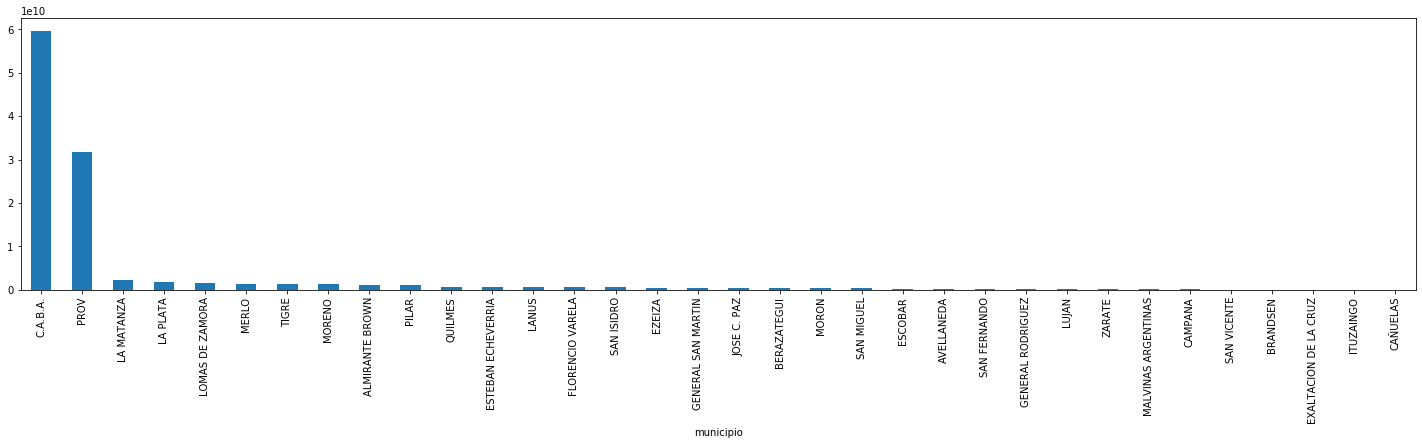

In [42]:
#Cuando miramos en detalle los municipios de la RMBA, vemos que la Ciudad es -por lejos-
#el municipio que más subsidios recibió. Esto es, por ejemplo, 27 veces lo percibido por La Matanza. 

#lamentablemente el dataset no distingue a qué municipios se otorga una gran cantidad de subsidios, englobados en 'PROV'

data_subsidiosCD_muni.plot.bar(figsize=(25,5))
print("Subsidios por municipio")

In [43]:
# Verificamos cómo quedó nuestro dataset
print(f'Nos quedamos con un df de {results6.shape[0]} filas x {results6.shape[1]} columnas')

Nos quedamos con un df de 16348 filas x 9 columnas


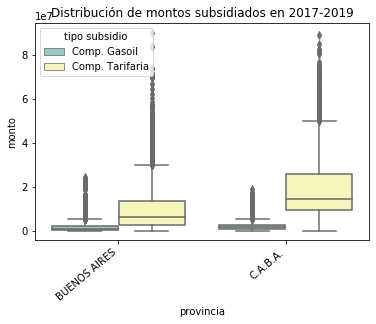

In [44]:
#Box Plot para ver la distribución en estas jurisdicciones
ay = sns.boxplot(x = results6.provincia, y = results6.monto, data = results6, hue="tipo subsidio", palette="Set3")
ay.set_xticklabels(ay.get_xticklabels(), rotation=40, ha="right")
plt.title("Distribución de montos subsidiados en 2017-2019")
plt.show()

### A continuación extraemos las variable 'cantidad de provincias' y 'cantidad de municipios 'por los que pasa una empresa/cuit

In [45]:
results6pivot=pd.pivot_table(results6,index=["cuit","provincia", "municipio"], values=["monto"], aggfunc=np.sum, margins=True, fill_value=0)
results6pivot

monto
cuit          provincia    municipio                      
20-01143816-5 BUENOS AIRES PROV               5.253236e+06
20-06956154-4 C.A.B.A.     C.A.B.A.           0.000000e+00
23-13418186-9 C.A.B.A.     C.A.B.A.           0.000000e+00
30-52276217-9 BUENOS AIRES BERAZATEGUI        3.446527e+08
                           PROV               5.202224e+08
                           QUILMES            1.268513e+08
              C.A.B.A.     C.A.B.A.           1.588940e+09
30-53313348-3 C.A.B.A.     C.A.B.A.           0.000000e+00
30-54563704-5 BUENOS AIRES ALMIRANTE BROWN    3.129667e+07
                           PROV               4.739196e+08
                           SAN VICENTE        4.104530e+07
              C.A.B.A.     C.A.B.A.           1.363846e+09
30-54566659-2 BUENOS AIRES LA PLATA           1.433654e+08
                           PROV               3.334226e+08
30-54567447-1 BUENOS AIRES PROV               5.784799e+07
30-54577578-2 C.A.B.A.     C.A.B.A.           5.493467e+08
30-54577585-5 BUENOS AIRES PROV               1.242822e+07
              C.A.B.A.     C.A.B.A.           1.051487e+09
30-54622131-4 C.A.B.A.     C.A.B.A.           0.000000e+00
30-54622179-9 C.A.B.A.     C.A.B.A.           0.000000e+00
30-54622230-2 BUENOS AIRES PROV               5.216869e+05
              C.A.B.A.     C.A.B.A.           0.000000e+00
30-54622278-7 BUENOS AIRES PROV               8.731453e+06
30-54622322-8 BUENOS AIRES PROV               1.555485e+08
30-54622346-5 BUENOS AIRES PROV               4.105242e+08
              C.A.B.A.     C.A.B.A.           1.115703e+09
30-54622391-0 C.A.B.A.     C.A.B.A.           8.508115e+08
30-54622438-0 BUENOS AIRES LA MATANZA         3.078973e+08
                           MORON              7.113835e+07
                           PROV               1.138651e+09
...                                                    ...
33-54625543-9 BUENOS AIRES PROV               1.702669e+08
33-54625963-9 BUENOS AIRES PROV               1.876492e+09
33-54626188-9 C.A.B.A.     C.A.B.A.           5.236757e+08
33-54633982-9 C.A.B.A.     C.A.B.A.           2.065564e+09
33-54634565-9 BUENOS AIRES ALMIRANTE BROWN    5.081653e+07
                           LOMAS DE ZAMORA    1.080533e+08
                           PROV               9.531463e+08
33-54634954-9 BUENOS AIRES GENERAL RODRIGUEZ  1.939697e+08
                           MORENO             1.280589e+09
                           PROV               8.453459e+08
33-54635070-9 BUENOS AIRES PROV               5.473498e+08
33-54635568-9 C.A.B.A.     C.A.B.A.           3.583402e+08
33-54650572-9 C.A.B.A.     C.A.B.A.           0.000000e+00
33-54661071-9 BUENOS AIRES ALMIRANTE BROWN    1.758176e+07
                           AVELLANEDA         2.108539e+08
                           PROV               7.804950e+08
              C.A.B.A.     C.A.B.A.           9.383512e+08
33-54662883-9 C.A.B.A.     C.A.B.A.           0.000000e+00
33-56437957-9 BUENOS AIRES PROV               2.347478e+07
33-56815582-9 BUENOS AIRES FLORENCIO VARELA   3.975318e+08
                           PROV               1.389034e+08
33-58061693-9 BUENOS AIRES PROV               1.323799e+07
33-62074555-9 BUENOS AIRES ALMIRANTE BROWN    1.313405e+08
33-62854085-9 BUENOS AIRES PROV               4.434500e+06
33-65973590-9 C.A.B.A.     C.A.B.A.           0.000000e+00
33-70223426-9 C.A.B.A.     C.A.B.A.           1.199550e+09
33-71031597-9 BUENOS AIRES PROV               2.558592e+07
33-71528200-9 BUENOS AIRES MERLO              3.848208e+08
34-54636455-2 C.A.B.A.     C.A.B.A.           0.000000e+00
All                                           1.095862e+11

[275 rows x 1 columns]

In [46]:
results6pivot.reset_index(inplace=True)

In [47]:
results6pivot.head()

,cuit,provincia,municipio,monto
0,20-01143816-5,BUENOS AIRES,PROV,5.253236e+06
1,20-06956154-4,C.A.B.A.,C.A.B.A.,0.000000e+00
2,23-13418186-9,C.A.B.A.,C.A.B.A.,0.000000e+00
3,30-52276217-9,BUENOS AIRES,BERAZATEGUI,3.446527e+08
4,30-52276217-9,BUENOS AIRES,PROV,5.202224e+08


#### Generamos un df donde sólo queden cuit y 'provincias', dropeamos, eliminamos duplicados y contamos. Lo mismo hacemos para 'municipios'

In [48]:
results6pivot_prov=results6pivot.drop(['municipio','monto',], axis=1)
print(results6pivot_prov.shape)
results6pivot_prov.head(5)

(275, 2)


,cuit,provincia
0,20-01143816-5,BUENOS AIRES
1,20-06956154-4,C.A.B.A.
2,23-13418186-9,C.A.B.A.
3,30-52276217-9,BUENOS AIRES
4,30-52276217-9,BUENOS AIRES


In [49]:
results6pivot_prov.drop_duplicates(inplace=True,keep='first')
print(results6pivot_prov.shape)
results6pivot_prov.head(5)

(228, 2)


,cuit,provincia
0,20-01143816-5,BUENOS AIRES
1,20-06956154-4,C.A.B.A.
2,23-13418186-9,C.A.B.A.
3,30-52276217-9,BUENOS AIRES
6,30-52276217-9,C.A.B.A.


In [50]:
#extraemos la variable provincias por los que pasa un cuit/empresa -> será 1 o 2
cuitsporprovincia = results6pivot_prov.groupby(["cuit"])["provincia"].count().sort_values(ascending=False).to_frame(name = 'cant_provincias')
cuitsporprovincia

,cant_provincias
cuit,
30-54634060-7,2
30-54625352-6,2
30-54624700-3,2
30-54622469-0,2
30-54622438-0,2
30-54622896-3,2
30-54622346-5,2
30-54622964-1,2
30-54622230-2,2


In [51]:
results6pivot_muni=results6pivot.drop(['provincia','monto',], axis=1)
print(results6pivot_muni.shape)
results6pivot_muni.head(5)

(275, 2)


,cuit,municipio
0,20-01143816-5,PROV
1,20-06956154-4,C.A.B.A.
2,23-13418186-9,C.A.B.A.
3,30-52276217-9,BERAZATEGUI
4,30-52276217-9,PROV


In [52]:
results6pivot_muni.drop_duplicates(inplace=True,keep='first')
print(results6pivot_muni.shape)
results6pivot_muni.head(5)

(275, 2)


,cuit,municipio
0,20-01143816-5,PROV
1,20-06956154-4,C.A.B.A.
2,23-13418186-9,C.A.B.A.
3,30-52276217-9,BERAZATEGUI
4,30-52276217-9,PROV


In [53]:
results6pivot_prov=results6pivot.drop(['municipio','monto',], axis=1)
print(results6pivot_prov.shape)
results6pivot_prov.head(5)

(275, 2)


,cuit,provincia
0,20-01143816-5,BUENOS AIRES
1,20-06956154-4,C.A.B.A.
2,23-13418186-9,C.A.B.A.
3,30-52276217-9,BUENOS AIRES
4,30-52276217-9,BUENOS AIRES


In [54]:
results6pivot_prov.drop_duplicates(inplace=True,keep='first')
print(results6pivot_prov.shape)
results6pivot_prov.head(5)

(228, 2)


,cuit,provincia
0,20-01143816-5,BUENOS AIRES
1,20-06956154-4,C.A.B.A.
2,23-13418186-9,C.A.B.A.
3,30-52276217-9,BUENOS AIRES
6,30-52276217-9,C.A.B.A.


In [103]:
#extraemos la variable municipios por los que pasa un cuit/empresa
cuitspormunicipio = results6pivot_muni.groupby(["cuit"])["municipio"].count().sort_values(ascending=False).to_frame(name = 'cant_municipio')
cuitspormunicipio

,cant_municipio
cuit,
30-54622896-3,5
30-69225833-5,4
30-52276217-9,4
30-54563704-5,4
30-54622438-0,4
33-54661071-9,4
30-54622889-0,3
33-54634954-9,3
30-54653274-3,3


#### Importamos el dataset que contiene la cantidad de operaciones de SUBE para cada empresa

In [55]:
# Importamos el Dataset de viajes por año por empresa para la RMBA
data_viajes_empresa = pd.read_csv('cancelaciones_año_empresa.csv', delimiter=';')
print(data_viajes_empresa.shape)
print("Dataset que contiene cantidad de viajes por empresa")
data_viajes_empresa.tail(5)

(802, 3)
Dataset que contiene cantidad de viajes por empresa


,anio,EMPRESA,TOTAL
797,2016,VILLA BOSCH S.A.C.E I,7838104
798,2016,VILLA GALICIA SAN JOSE S.A.,39252436
799,2016,VILLA NUEVA S.A.,19222940
800,2016,VUELTA DE ROCHA S.A.T.C.I.,11019614
801,2016,YITOS S.A.,25727724


In [56]:
#Tiene info de los años 2016 a 2019
data_viajes_empresa['anio'].unique()

array([2019, 2018, 2017, 2016])

In [57]:
#Armamos una tabla pivote para ver ordenar la cantidad de viajes por empresa, año a año
pivote_empresas = pd.pivot_table(data_viajes_empresa,values = 'TOTAL',columns = 'anio', index = data_viajes_empresa.EMPRESA.values, aggfunc = np.sum, fill_value=0)
pivote_empresas

anio,2016,2017,2018,2019
17 DE AGOSTO S.A.,11272753,10957866,9793441,4492546
25 DE MAYO LINEA 278 S.A.,41466600,0,0,0
4 DE SEPTIEMBRE S.A.T.C.P.,2663045,15232576,14427177,6708909
ALMAFUERTE EMPRESA DE TRANSPOR,42211693,0,0,0
ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I,8194493,49337556,47528366,21473490
ALMAFUERTE S.A.T.A.C.I.,13043946,12534581,11817864,5304018
ANTARTIDA ARGENTINA,7204343,0,0,0
AUTOBUSES BS AS SRL- TTE LARRAZABAL SRL- UT,0,0,9019259,5426182
AUTOBUSES BUENOS AIRES SRL,9294354,18362901,18157241,7934377
AUTOBUSES SANTA FE S.R.L,9302914,0,0,0


In [58]:
empresas_data_viajes_empresa=len(data_viajes_empresa['EMPRESA'].unique())
print(f'Tenemos datos de {empresas_data_viajes_empresa} empresas únicas en data_viajes_empresa pero cuidado que los nombres tienen typos así que pueden ser menos empresas')

Tenemos datos de 295 empresas únicas en data_viajes_empresa pero cuidado que los nombres tienen typos así que pueden ser menos empresas


Por ejemplo **COLECTIVEROS UNIDOS S.A y COLECTIVEROS UNIDOS S.A.**, no están exactamente igual por lo tanto tendremos que corregirlo.

### Con las siguientes líneas de código intentaremos matchear las razones sociales del Df data_viajes_empresa con los nombres que figuran en la tabla pivote armada sobre las razones sociales que figuran en el dataset de SISTAU 

In [59]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [60]:
#Nombre de empresas en results5
empresas1=results5['razon_social'].unique()
print(len(empresas1))
empresas1

743


array(['TRANSPORTE DEL SUR SRL', 'EMPRESA DE TRANSPORTE DEL SUR SRL',
       'EMPRESA 501 S.A.', nan, 'EXPRESO VILLA GALICIA SAN JOSE S.A.',
       'GENERAL TOMAS GUIDO S.A.C.I.F.', 'LANGE, DANTE RAÚL',
       'LEMOS & RODRIGUEZ S.A.', 'BAHÍA TRANSPORTE SAPEM',
       'TRANSPORTE AUTOMOTOR SAN GABRIEL S.A.',
       'MICRO OMNIBUS QUILMES SA COM IND Y FINANC',
       'EMPRESA DE TRANSPORTE SANTA RITA S.R.L.',
       'MICRO OMNIBUS TIGRE S.A.',
       'COOPERATIVA DE TRABAJO 6 DE JULIO LIMITADA',
       'LINEA EXPRESO LINIERS S.A.', 'COMPAÑIA LA ISLEÑA S.R.L.',
       'LINEA SESENTA S.A.', 'EMPRESA MONTE GRANDE S.A. LINEA 501',
       'RUTA BUS SA', 'EMPRESA J.M. EZEIZA S.R.L.',
       'MICRO OMNIBUS PRIMERA JUNTA S.A.',
       'COMPANIA MICROOMNIBUS LA COLORADA SACI',
       'TRANSPORTES SAN JUAN BAUTISTA SA',
       'EMPRESA DE TRANSPORTE 12 DE OCTUBRE S.R.L.',
       'EMPRESA DE TRANSPORTES PERALTA RAMOS S.A.C.I.',
       'EL LIBERTADOR S.R.L.', 'TRANSPORTES 25 DE MAYO S.R.L.',
      

In [61]:
#Nombre de empresas en dataset que tiene viajes por empresa 
empresas2=data_viajes_empresa['EMPRESA'].unique()
print(len(empresas2))
empresas2

295


array(['17 DE AGOSTO S.A.', '4 DE SEPTIEMBRE S.A.T.C.P.',
       'ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I',
       'ALMAFUERTE S.A.T.A.C.I.',
       'AUTOBUSES BS AS SRL- TTE LARRAZABAL SRL- UT',
       'AUTOBUSES BUENOS AIRES SRL', 'AZUL S.A. DE TRANSPORTE AUTOMOTOR',
       'BERNARDINO RIVADAVIA S.A.T.A.',
       'BUENOS AIRES BUS SOCIEDAD ANONIMA', 'BUS DEL OESTE S.A.',
       'CARDENAS S.A. EMPRESA DE TRANSPORTES',
       'CIA ANDRADE EMPRESA DE TRANSPORTE DE PASAJEROS SRL',
       'CIA LA PAZ AMADOR MOURE SACIFIYA', 'COLECTIVEROS UNIDOS S.A.',
       'COMPAÑÍA DE OMNIBUS 25 DE MAYO LINEA 278',
       'COMPAÑIA ISLEÑA S.R.L.', 'COMPAÑIA MICROOMNIBUS LA COLORADA SACI',
       'COMPAÑIA NOROESTE S.A.T.',
       'COMPAÑIA\xa0 DE TRANSPORTE VECINAL S.A.',
       'COOPERATIVA DE TRABAJO 3 DE JULIO LIMITADA',
       'COOPERATIVA DE TRABAJO 6 DE JULIO LIMITADA',
       'D.O.T.A. S.A. DE TRANSPORTE AUTOMOTOR',
       'D.U.V.I. SOCIEDAD ANONIMA', 'EL NUEVO HALCON S.A.',
       'EL PUE

In [ ]:
# ciclo for para matchearlas

highest = []
for i in empresas2:
    highest.append(process.extractOne(i,empresas1))
    print(highest)
    
pd.DataFrame(highest)

### Le colocamos la razón social correcta a df data_viajes_empresa

In [62]:
# Este dataset fué generado con la info obtenida del proceso de fuzzy matching, para el cual tuvimos que corregir también
# algunos nombres que no estaban bien asignados
nombres_viajes = pd.read_csv('Nombres_empresas_DataViajes.csv', delimiter=',')

In [63]:
nombres_viajes.head()

,INDEX,NOMBRE_DATA_VIAJES,NOMBRE_RESULTS_5,RATIO,Unnamed: 4
0,1,17 DE AGOSTO S.A.,17 DE AGOSTO S.A.,100,NaN
1,2,ALMAFUERTE S.A.T.A.C.I.,ALMAFUERTE S.A.T.A.C.I.,100,NaN
2,3,AZUL S.A. DE TRANSPORTE AUTOMOTOR,AZUL S.A. DE TRANSPORTE AUTOMOTOR,100,NaN
3,4,BERNARDINO RIVADAVIA S.A.T.A.,BERNARDINO RIVADAVIA S.A.T.A.,100,NaN
4,5,BUS DEL OESTE S.A.,BUS DEL OESTE S.A.,100,NaN


In [64]:
nombres_viajes=nombres_viajes.drop(['Unnamed: 4', 'INDEX'], axis=1)

In [65]:
mergeo_viajes = pd.merge(data_viajes_empresa,nombres_viajes, left_on='EMPRESA',right_on='NOMBRE_DATA_VIAJES', how='left')
mergeo_viajes

,anio,EMPRESA,TOTAL,NOMBRE_DATA_VIAJES,NOMBRE_RESULTS_5,RATIO
0,2019,17 DE AGOSTO S.A.,4492546,17 DE AGOSTO S.A.,17 DE AGOSTO S.A.,100.0
1,2019,4 DE SEPTIEMBRE S.A.T.C.P.,6708909,4 DE SEPTIEMBRE S.A.T.C.P.,4 DE SEPTIEMBRE SATCP,91.0
2,2019,ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I,21473490,ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,93.0
3,2019,ALMAFUERTE S.A.T.A.C.I.,5304018,ALMAFUERTE S.A.T.A.C.I.,ALMAFUERTE S.A.T.A.C.I.,100.0
4,2019,AUTOBUSES BS AS SRL- TTE LARRAZABAL SRL- UT,5426182,AUTOBUSES BS AS SRL- TTE LARRAZABAL SRL- UT,AUTOBUSES BUENOS AIRES SRL,86.0
5,2019,AUTOBUSES BUENOS AIRES SRL,7934377,AUTOBUSES BUENOS AIRES SRL,AUTOBUSES BUENOS AIRES SRL,98.0
6,2019,AZUL S.A. DE TRANSPORTE AUTOMOTOR,27577109,AZUL S.A. DE TRANSPORTE AUTOMOTOR,AZUL S.A. DE TRANSPORTE AUTOMOTOR,100.0
7,2019,BERNARDINO RIVADAVIA S.A.T.A.,9758578,BERNARDINO RIVADAVIA S.A.T.A.,BERNARDINO RIVADAVIA S.A.T.A.,100.0
8,2019,BUENOS AIRES BUS SOCIEDAD ANONIMA,1859935,BUENOS AIRES BUS SOCIEDAD ANONIMA,BUENOS AIRES BUS S.A.,86.0
9,2019,BUS DEL OESTE S.A.,2085346,BUS DEL OESTE S.A.,BUS DEL OESTE S.A.,100.0


In [66]:
#Tabla Pivot con cantidad de viajes por año, con el nombre correcto
A=pd.pivot_table(mergeo_viajes,index=["NOMBRE_RESULTS_5"],values=["TOTAL"],columns=["anio"], aggfunc=np.sum)
A

TOTAL               \
anio                                                       2016         2017   
NOMBRE_RESULTS_5                                                               
17 DE AGOSTO S.A.                                    11272753.0   10957866.0   
4 DE SEPTIEMBRE SATCP                                16336861.0   15232576.0   
5 DE AGOSTO SRL                                       3618626.0    3753067.0   
ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI              50406186.0   49337556.0   
ALMAFUERTE S.A.T.A.C.I.                              13043946.0   12534581.0   
AUTOBUSES BUENOS AIRES  SRL                           9294354.0   18362901.0   
AUTOBUSES BUENOS AIRES SRL                                  NaN          NaN   
AUTOBUSES SANTA FE S.R.L                              9302914.0          NaN   
AZUL S.A. DE TRANSPORTE AUTOMOTOR                    58138351.0   58583926.0   
BAHÍA TRANSPORTE SAPEM                                      NaN          NaN   
BERNARDINO RIVADAVIA S.A.T.A.                        22399083.0   23300084.0   
BUENOS AIRES BUS S.A.                                 4409642.0    4242348.0   
BUS DEL OESTE S.A.                                    5440671.0    5263261.0   
C.O.S.A. COMPAÑIA DE TRANSPORTE VECINAL S.A. UN...    5761751.0   12955952.0   
CARDENAS S.A.                                        15168017.0   14935636.0   
CIA DE TRANSPORTE VECINAL SOCIEDAD ANONIMA            5161193.0          NaN   
CIA LA PAZ AMADOR MOURE SACIFIYA                     10296371.0    9967850.0   
CIA NOROESTE S A DE TRANSPORTE                       40032916.0   38064305.0   
COLECTIVEROS UNIDOS SOCIEDAD ANONIMA C U S A         13412501.0   13462047.0   
COMPANIA MICROOMNIBUS LA COLORADA SACI               22848477.0   23129498.0   
COMPAÑIA ANDRADE EMPRESA DE TRANSPORTE DE PASAJ...    2409649.0   13660401.0   
COMPAÑIA LA ISLEÑA S.R.L.                            54896941.0   51701438.0   
COMPAÑIA OMNIBUS 25 DE MAYO LINEA 278 S.A.           48017278.0   47931857.0   
COOPERATIVA DE TRABAJO 3 DE JULIO LTDA.               3977832.0    4742594.0   
COOPERATIVA DE TRABAJO 6 DE JULIO LIMITADA             871421.0     944678.0   
DOTA SA DE TRANSPORTE AUTOMOTOR                      52302498.0   48247102.0   
DUVI S.A.                                            13127201.0   12070357.0   
EL NUEVO HALCON SA                                   23857489.0   16922619.0   
EL PUENTE SAT                                        21213560.0   20966559.0   
EL RAPIDO ARGENTINO CIA DE MICROOMNIBUS S.A.            32613.0       3547.0   
...                                                         ...          ...   
TRANSPORTES ATLANTIDA S.A.C.                         18766016.0   19705598.0   
TRANSPORTES AUTOMOTORES CALLAO SA                    30102510.0   30909220.0   
TRANSPORTES AUTOMOTORES DE PASAJEROS SIGLO VEIN...    8578084.0    8559324.0   
TRANSPORTES AUTOMOTORES LANUS ESTE SOCIEDAD ANÓ...   11961274.0   11565332.0   
TRANSPORTES AUTOMOTORES RIACHUELO S.A.               32477968.0   31453640.0   
TRANSPORTES AVENIDA BERNARDO ADER S.A.               14797524.0   14786497.0   
TRANSPORTES COLEGIALES SACI                           9876991.0   10123217.0   
TRANSPORTES DEL TEJAR SA                              8767771.0    8814901.0   
TRANSPORTES JOSE HERNANDEZ S.A.C.I.                   7146582.0    7043539.0   
TRANSPORTES LA PERLITA S.A.                         107713629.0  105517608.0   
TRANSPORTES LA UNION SRL                              2110407.0   13408816.0   
TRANSPORTES LOPE DE VEGA S A C I                     38822578.0   39216057.0   
TRANSPORTES NUEVA CHICAGO C I S A                    17356052.0   17128026.0   
TRANSPORTES NUEVE DE JULIO S.A.                       8275537.0          NaN   
TRANSPORTES QUIRNO COSTA SACEI.                      10078762.0   10055905.0   
TRANSPORTES RIO GRANDE SACIF                         29210066.0   27554025.0   
TRANSPORTES SAN CAYETANO S.A.C.                       5234

In [67]:
total2 = mergeo_viajes.isnull().sum().sort_values(ascending=False)
percent2 = (mergeo_viajes.isnull().sum()/mergeo_viajes.isnull().count()).sort_values(ascending=False)
missing_data_mergeo_viajes = pd.concat([total2, percent2], axis=1, keys=['Total', 'Percent'])
missing_data_mergeo_viajes.head(6)

,Total,Percent
RATIO,59,0.073566
NOMBRE_RESULTS_5,59,0.073566
NOMBRE_DATA_VIAJES,59,0.073566
TOTAL,0,0.000000
EMPRESA,0,0.000000
anio,0,0.000000


In [68]:
# ¿Cuáles son las líneas que tienen NaN?
mergeo_viajes_nan=mergeo_viajes.loc[mergeo_viajes.isnull().any(axis=1)]
print(mergeo_viajes_nan.shape)
mergeo_viajes_nan

(59, 6)


,anio,EMPRESA,TOTAL,NOMBRE_DATA_VIAJES,NOMBRE_RESULTS_5,RATIO
18,2019,COMPAÑIA DE TRANSPORTE VECINAL S.A.,2808538,NaN,NaN,NaN
59,2019,EXPRESO VILLA GALICIA SAN JOSE S.A.,20360177,NaN,NaN,NaN
61,2019,FERROVIAS S.A.,13952830,NaN,NaN,NaN
66,2019,INTERISLEÑA S.A.C.I.,2372,NaN,NaN,NaN
90,2019,METROVIAS,155234556,NaN,NaN,NaN
91,2019,METROVIAS S.A. (URQUIZA),13334434,NaN,NaN,NaN
108,2019,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,41355,NaN,NaN,NaN
109,2019,NACION SERVICIOS S.A.,775780,NaN,NaN,NaN
120,2019,SOFSE - Belgrano Sur,8035815,NaN,NaN,NaN
121,2019,SOFSE - Mitre,25639443,NaN,NaN,NaN


In [69]:
#Estas son las empresas que vamos a dropear por no haber podido matchear bien su nombre 
mergeo_viajes_nan['EMPRESA'].unique()

array(['COMPAÑIA\xa0 DE TRANSPORTE VECINAL S.A.',
       'EXPRESO VILLA GALICIA\xa0 SAN JOSE S.A.', 'FERROVIAS S.A.',
       'INTERISLEÑA S.A.C.I.', 'METROVIAS', 'METROVIAS S.A. (URQUIZA)',
       'MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS AIRE',
       'NACION SERVICIOS S.A.', 'SOFSE - Belgrano Sur', 'SOFSE - Mitre',
       'SOFSE - Roca', 'SOFSE - San Martin', 'SOFSE- SARMIENTO',
       'SOFSE- TREN DE LA COSTA', 'COMPAÑIA DE TRANSPORTE VECINAL S.A.',
       'C.A. ECOTRANS S.A.', 'COMPAÑIA TEMPERLEY S.R.L.',
       'EMPRESA GRAL. DE TRANPORTE AUTOMOTOR DE PASAJEROS',
       'FERROVIAS S.A.C', 'MUINICIPALIDAD DE ITUZAINGO',
       "O'HIGGINS S.A.T.", 'SOFSE-BELGRANO SUR', 'SOFSE-MITRE',
       'SOFSE-ROCA', 'SOFSE-SAN MARTIN', 'SOFSE-TREN DE LA COSTA',
       'TIGRE S.A. LINEA 723', 'TRANPOSRTE DE PASAJEROS SRL'],
      dtype=object)

### Ahora queremos ver qué cantidad de líneas tiene cada empresa de colectivos

In [70]:
#Importamos Dataset de líneas asociadas a empresas
#Resulta que una empresa puede tener varias líneas. Ej: NUDO tiene las líneas 107, 6 y 851
#Por ende, vamos a tener un obstáculo en identificar qué línea precisa recibió cuánto subsidio.
#Sólo podemos saberlo a nivel empresa
lineas=pd.read_csv('lineas.csv', delimiter=';', encoding = 'ISO-8859-1')
print(lineas.shape)
print("Dataset Lineas")
lineas.tail(5)

(31882, 5)
Dataset Lineas


,MODO,EMPRESA,LINEA,PERIODO,ACTUALIZACION
31877,TREN,SOFSE- TREN DE LA COSTA,FFCC TREN DE LA COSTA,201902,NaN
31878,TREN,SOFSE- TREN DE LA COSTA,FFCC TREN DE LA COSTA,201903,NaN
31879,TREN,SOFSE- TREN DE LA COSTA,FFCC TREN DE LA COSTA,201904,NaN
31880,TREN,SOFSE- TREN DE LA COSTA,FFCC TREN DE LA COSTA,201905,NaN
31881,TREN,SOFSE- TREN DE LA COSTA,FFCC TREN DE LA COSTA,201906,NaN


In [71]:
lineas['PERIODO'].unique()

array([201301, 201302, 201303, 201304, 201305, 201306, 201307, 201308,
       201309, 201310, 201311, 201312, 201401, 201402, 201403, 201404,
       201405, 201406, 201407, 201408, 201409, 201410, 201411, 201412,
       201501, 201502, 201503, 201504, 201505, 201506, 201507, 201508,
       201509, 201510, 201511, 201512, 201601, 201602, 201603, 201604,
       201605, 201606, 201607, 201608, 201609, 201610, 201611, 201612,
       201701, 201702, 201703, 201704, 201705, 201706, 201707, 201708,
       201709, 201710, 201711, 201712, 201801, 201802, 201803, 201804,
       201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812,
       201901, 201902, 201903, 201904, 201905, 201906])

In [72]:
#Nos quedamos sólo con los datos de Colectivos
lineas_colectivos= lineas.loc[lineas['MODO']=="COLECTIVO"]

In [73]:
print(lineas_colectivos.shape)
lineas_colectivos.head()

(30464, 5)


,MODO,EMPRESA,LINEA,PERIODO,ACTUALIZACION
0,COLECTIVO,17 DE AGOSTO S.A.,LINEA 26,201301,201907.0
1,COLECTIVO,17 DE AGOSTO S.A.,LINEA 26,201302,201907.0
2,COLECTIVO,17 DE AGOSTO S.A.,LINEA 26,201303,201907.0
3,COLECTIVO,17 DE AGOSTO S.A.,LINEA 26,201304,201907.0
4,COLECTIVO,17 DE AGOSTO S.A.,LINEA 26,201305,201907.0


In [74]:
pd.pivot_table(lineas_colectivos,index=["EMPRESA","LINEA"])

ACTUALIZACION  \
EMPRESA                                            LINEA                                  
17 DE AGOSTO S.A.                                  LINEA 26                    201907.0   
                                                   LINEA 847                   201907.0   
4 DE SEPTIEMBRE S.A.T.C.P.                         LINEA 37                    201907.0   
ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I      LINEA 218                   201907.0   
                                                   LINEA 284                   201907.0   
                                                   LINEA 325                   201907.0   
                                                   LINEA 378                   201907.0   
                                                   LINEA 622                   201907.0   
                                                   LINEA 628                   201907.0   
ALMAFUERTE S.A.T.A.C.I.                            LINEA 55                         NaN   
                                                   LINEA 835                        NaN   
AUTOBUSES BS AS SRL- TTE LARRAZABAL SRL- UT        LINEA 514                        NaN   
AUTOBUSES BUENOS AIRES SRL                         LINEA 540 BSAS                   NaN   
                                                   LINEA 550 BSAS                   NaN   
                                                   LINEA 552 BSAS                   NaN   
                                                   LINEA 553 BSAS                   NaN   
AUTOBUSES SANTA FE S.R.L                           LINEA 540                        NaN   
                                                   LINEA 540A                       NaN   
                                                   LINEA 550                        NaN   
                                                   LINEA 550A                       NaN   
                                                   LINEA 552                        NaN   
                                                   LINEA 552A                       NaN   
                                                   LINEA 553                        NaN   
                                                   LINEA 553A                       NaN   
AZUL S.A. DE TRANSPORTE AUTOMOTOR                  LINEA 203                        NaN   
                                                   LINEA 41                         NaN   
                                                   LINEA 853                        NaN   
BERNARDINO RIVADAVIA S.A.T.A.                      LINEA 113                        NaN   
                                                   LINEA 63                         NaN   
                                                   LINEA 801                        NaN   
...                                                                                 ...   
TREINTA DE AGOSTO                                  LINEA 500F                       NaN   
                                                   LINEA 502C                       NaN   
                                                   LINEA 503D                       NaN   
                                                   LINEA 505B                       NaN   
                                                   LINEA 506D                       NaN   
                                                   LINEA 507                        NaN   
                                                   LINEA 508B                       NaN   
                                                   LINEA 509B                       NaN   
                                                   LINEA 513B                       NaN   
TTES.AUTOMOTORES DE PASAJEROS SIGLO XXI SA         LINEA 181                        NaN   
UNION PLATENSE SRL                                 LINEA 214                        NaN   
                                                   LINEA 273          

In [75]:
# Pero si hacemos esta pivot, vemos que un mismo número de línea puede pertenecer a más de una empresa
# ver por ejemplo la línea 114

pd.pivot_table(lineas_colectivos,index=["LINEA","EMPRESA"])

,,ACTUALIZACION,PERIODO
LINEA,EMPRESA,,
LINEA 001 MERCEDES,TRANSPORTES ATLANTIDA S.A.C.,NaN,201805.500000
LINEA 001B,MICRO àMNIBUS MERCEDES SRL,NaN,201385.900000
LINEA 002 MERCEDES,TRANSPORTES ATLANTIDA S.A.C.,NaN,201805.500000
LINEA 002B,MICRO àMNIBUS MERCEDES SRL,NaN,201385.900000
LINEA 003A,MICRO àMNIBUS MERCEDES SRL,NaN,201385.900000
LINEA 061,LA CENTRAL DE VICENTE LOPEZ S.A.,NaN,201838.833333
LINEA 1,TRANSPORTES SAN CAYETANO S.A.C.,NaN,201583.192308
LINEA 10,LINEA 10 S.A.,NaN,201583.192308
LINEA 100,TRANSPORTES AUTOMOTORES RIACHUELO S.A.,NaN,201583.192308


In [76]:
print(f'Pasamos de tener {lineas.shape[0]} filas, a tener {lineas_colectivos.shape[0]} filas')

Pasamos de tener 31882 filas, a tener 30464 filas


In [77]:
lineas_colectivos=lineas_colectivos.drop(['PERIODO','ACTUALIZACION'], axis=1)

In [78]:
print(lineas_colectivos.shape)
lineas_colectivos.head()

(30464, 3)


,MODO,EMPRESA,LINEA
0,COLECTIVO,17 DE AGOSTO S.A.,LINEA 26
1,COLECTIVO,17 DE AGOSTO S.A.,LINEA 26
2,COLECTIVO,17 DE AGOSTO S.A.,LINEA 26
3,COLECTIVO,17 DE AGOSTO S.A.,LINEA 26
4,COLECTIVO,17 DE AGOSTO S.A.,LINEA 26


In [79]:
#Si hacemos un drop por subset Linea nos hace perder datos porque una línea puede tener más de una empresa asociada
#Tenemos que hacer un simple drop_duplicates
lineas_colectivos.drop_duplicates(inplace=True,keep='first')

In [80]:
#Sabemos la cantidad de líneas que tiene cada empresa
lineas_colectivos_agrupado = lineas_colectivos.groupby(["EMPRESA"])["LINEA"].count().sort_values(ascending=False)
lineas_colectivos_agrupado

EMPRESA
SAN VICENTE S.A. DE TRANSPORTES                  14
CONSULTORES ASOCIADOS ECOTRANS S.A.              11
EMPRESA DEL OESTE SAT                            10
TREINTA DE AGOSTO                                10
MICRO OMNIBUS TIGRE S.A.                         10
TRANSPORTES SAN JUAN BAUTISTA S.A.               10
GENERAL TOMAS GUIDO S.A.C.I.F.                   10
EMPRESA LINEA 216 S.A.T.                         10
LA CENTRAL DE VICENTE LOPEZ S.A.                  9
TRANSPORTE AUTOMOTOR PLAZA S.A.C.I.               9
LA CABA¥A S.A.                                    8
UNION PLATENSE SRL                                8
AUTOBUSES SANTA FE S.R.L                          8
TRANSPORTES LA PERLITA S.A.                       7
EMPRESA NUEVE DE JULIO S.A.T.                     7
EXPRESO VILLA GALICIAÿ SAN JOSE S.A.              7
MICRO OMNIBUS QUILMES S.A.C.I. Y F.               7
LA NUEVA METROPOL S.A.                            7
COMPA¥ÖA DE OMNIBUS 25 DE MAYO LINEA 278          7
TRAN

In [81]:
empresas3=lineas_colectivos['EMPRESA'].unique()
print(len(empresas3))
empresas3

179


array(['17 DE AGOSTO S.A.', '4 DE SEPTIEMBRE S.A.T.C.P.',
       'ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I',
       'ALMAFUERTE S.A.T.A.C.I.',
       'AUTOBUSES BS AS SRL- TTE LARRAZABAL SRL- UT',
       'AUTOBUSES BUENOS AIRES SRL', 'AUTOBUSES SANTA FE S.R.L',
       'AZUL S.A. DE TRANSPORTE AUTOMOTOR',
       'BERNARDINO RIVADAVIA S.A.T.A.',
       'BUENOS AIRES BUS SOCIEDAD ANONIMA', 'BUS DEL OESTE S.A.',
       'CARDENAS S.A. EMPRESA DE TRANSPORTES',
       'CIA ANDRADE EMPRESA DE TRANSPORTE DE PASAJEROS SRL',
       'CIA LA PAZ AMADOR MOURE SACIFIYA', 'COLECTIVEROS UNIDOS S.A.',
       'COMPA¥ÖA DE OMNIBUS 25 DE MAYO LINEA 278',
       'COMPA¥IA ISLE¥A S.R.L.', 'COMPA¥IA MICROOMNIBUS LA COLORADA SACI',
       'COMPA¥ÖA MICROOMNIBUS TEMPERLEY SRL', 'COMPA¥IA NOROESTE S.A.T.',
       'COMPA¥IAÿ DE TRANSPORTE VECINAL S.A.',
       'CONSULTORES ASOCIADOS ECOTRANS S.A.',
       'COOPERATIVA DE TRABAJO 3 DE JULIO LIMITADA',
       'COOPERATIVA DE TRABAJO 6 DE JULIO LIMITADA',
     

In [ ]:
#ciclo For para asignarle el mismo nombre que figura en el dataset de SISTAU

highest1 = []
for i in empresas3:
    highest1.append(process.extractOne(i,empresas1))
    print(highest)
    
pd.DataFrame(highest1)

### Le colocamos la razón social correcta al Df data_lineas

In [82]:
# Este dataset también fué generado con la info obtenida del proceso de fuzzy matching, para el cual tuvimos
# que corregir también algunos nombres que no estaban bien asignados
nombres_lineas = pd.read_csv('Nombres_empresas_DataLineas.csv', delimiter=',')

In [83]:
nombres_lineas.head()

,INDEX,NOMBRE_LINEAS,NOMBRE_RESULTS_5,RATIO,CASO_NUEVO
0,1,17 DE AGOSTO S.A.,17 DE AGOSTO S.A.,100,NaN
1,4,ALMAFUERTE S.A.T.A.C.I.,ALMAFUERTE S.A.T.A.C.I.,100,NaN
2,7,AUTOBUSES SANTA FE S.R.L,AUTOBUSES SANTA FE S.R.L,100,NaN
3,8,AZUL S.A. DE TRANSPORTE AUTOMOTOR,AZUL S.A. DE TRANSPORTE AUTOMOTOR,100,NaN
4,9,BERNARDINO RIVADAVIA S.A.T.A.,BERNARDINO RIVADAVIA S.A.T.A.,100,NaN


In [84]:
nombres_lineas=nombres_lineas.drop(['CASO_NUEVO','INDEX'], axis=1)

In [85]:
mergeo_lineas = pd.merge(lineas_colectivos,nombres_lineas, left_on='EMPRESA',right_on='NOMBRE_LINEAS', how='left')
mergeo_lineas

,MODO,EMPRESA,LINEA,NOMBRE_LINEAS,NOMBRE_RESULTS_5,RATIO
0,COLECTIVO,17 DE AGOSTO S.A.,LINEA 26,17 DE AGOSTO S.A.,17 DE AGOSTO S.A.,100.0
1,COLECTIVO,17 DE AGOSTO S.A.,LINEA 847,17 DE AGOSTO S.A.,17 DE AGOSTO S.A.,100.0
2,COLECTIVO,4 DE SEPTIEMBRE S.A.T.C.P.,LINEA 37,4 DE SEPTIEMBRE S.A.T.C.P.,4 DE SEPTIEMBRE SATCP,91.0
3,COLECTIVO,ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I,LINEA 218,ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,93.0
4,COLECTIVO,ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I,LINEA 284,ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,93.0
5,COLECTIVO,ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I,LINEA 325,ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,93.0
6,COLECTIVO,ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I,LINEA 378,ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,93.0
7,COLECTIVO,ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I,LINEA 622,ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,93.0
8,COLECTIVO,ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I,LINEA 628,ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,93.0
9,COLECTIVO,ALMAFUERTE S.A.T.A.C.I.,LINEA 55,ALMAFUERTE S.A.T.A.C.I.,ALMAFUERTE S.A.T.A.C.I.,100.0


In [86]:
#Tabla Pivot con cantidad de líneas de colectivo por empresa, con el nombre correcto
C = mergeo_lineas.groupby(["NOMBRE_RESULTS_5"])["LINEA"].count().sort_values(ascending=False).to_frame(name = 'cant_lineas').reset_index()
C

,NOMBRE_RESULTS_5,cant_lineas
0,EMPRESA SAN VICENTE S. A. DE TRANSPORTES,14
1,EMPRESA LINEA DOSCIENTOS DIECISEIS S A DE TRAN...,10
2,EMPRESA DEL OESTE S.A. DE TRANSPORTES,10
3,GENERAL TOMAS GUIDO S.A.C.I.F.,10
4,MICRO OMNIBUS TIGRE S.A.,10
5,TRANSPORTES SAN JUAN BAUTISTA SA,10
6,LA CENTRAL DE VICENTE LOPEZ S.A.C.,9
7,TRANSPORTE AUTOMOTOR PLAZA SACI,9
8,UNION PLATENSE S.R.L.,8
9,AUTOBUSES SANTA FE S.R.L,8


In [87]:
total3 = mergeo_lineas.isnull().sum().sort_values(ascending=False)
percent3 = (mergeo_lineas.isnull().sum()/mergeo_lineas.isnull().count()).sort_values(ascending=False)
missing_data_mergeo_lineas = pd.concat([total3, percent3], axis=1, keys=['Total', 'Percent'])
missing_data_mergeo_lineas.head(6)

,Total,Percent
RATIO,36,0.066421
NOMBRE_RESULTS_5,36,0.066421
NOMBRE_LINEAS,36,0.066421
LINEA,0,0.000000
EMPRESA,0,0.000000
MODO,0,0.000000


In [88]:
## Dropeamos las que tienen NaNs por no haber podido matchearlas con ninguna empresa del SISTAU!
mergeo_lineas_nan=mergeo_lineas.loc[mergeo_lineas.isnull().any(axis=1)]
print(mergeo_lineas_nan.shape)
mergeo_lineas_nan

(36, 6)


,MODO,EMPRESA,LINEA,NOMBRE_LINEAS,NOMBRE_RESULTS_5,RATIO
57,COLECTIVO,COMPA¥ÖA MICROOMNIBUS TEMPERLEY SRL,LINEA 549,NaN,NaN,NaN
63,COLECTIVO,CONSULTORES ASOCIADOS ECOTRANS S.A.,LINEA 136,NaN,NaN,NaN
64,COLECTIVO,CONSULTORES ASOCIADOS ECOTRANS S.A.,LINEA 153,NaN,NaN,NaN
65,COLECTIVO,CONSULTORES ASOCIADOS ECOTRANS S.A.,LINEA 163,NaN,NaN,NaN
66,COLECTIVO,CONSULTORES ASOCIADOS ECOTRANS S.A.,LINEA 174,NaN,NaN,NaN
67,COLECTIVO,CONSULTORES ASOCIADOS ECOTRANS S.A.,LINEA 253,NaN,NaN,NaN
68,COLECTIVO,CONSULTORES ASOCIADOS ECOTRANS S.A.,LINEA 317,NaN,NaN,NaN
69,COLECTIVO,CONSULTORES ASOCIADOS ECOTRANS S.A.,LINEA 321,NaN,NaN,NaN
70,COLECTIVO,CONSULTORES ASOCIADOS ECOTRANS S.A.,LINEA 322,NaN,NaN,NaN
71,COLECTIVO,CONSULTORES ASOCIADOS ECOTRANS S.A.,LINEA 503A,NaN,NaN,NaN


### Ahora queremos compilar *results 6* con las tablas que contienen cantidad de líneas por empresa y cantidad de viajes por empresa

In [89]:
#creamos esta tabla pivot a partir de results6 para:
## a. ordenar los datos de results6 por cuit único
## b. eliminar las columnas provincia y municipio y así evitar repetir info cuando agreguemos los datos de viajes y cant. de líneas
results7=pd.pivot_table(results6,index=["razon_social", "cuit"],values=["monto"],columns=["tipo subsidio", "año"], aggfunc=np.sum)
results7

monto  \
tipo subsidio                                                     Comp. Gasoil   
año                                                                       2017   
razon_social                                       cuit                          
17 DE AGOSTO S.A.                                  30-57190196-6  1.206839e+07   
4 DE SEPTIEMBRE SATCP                              30-54636615-0  2.199101e+07   
5 DE AGOSTO SRL                                    30-57197043-7  3.451092e+06   
ALBUS SRL                                          33-65973590-9  0.000000e+00   
ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI            30-54641796-0  6.694724e+07   
ALMAFUERTE S.A.T.A.C.I.                            33-54568440-9  2.103652e+07   
AUTOBUSES BUENOS AIRES  SRL                        30-71521580-9  1.921679e+07   
AZUL S.A. DE TRANSPORTE AUTOMOTOR                  33-54625963-9  1.092797e+08   
BALUT HNOS. S.R.L.                                 30-58121405-3  0.000000e+00   
BERNARDINO RIVADAVIA S.A.T.A.                      30-54622810-6  2.802138e+07   
BUENOS AIRES BUS S.A.                              30-70818819-7  8.384609e+06   
BUS DEL OESTE S.A.                                 30-70554911-3  1.107965e+07   
C.O.S.A. COMPAÑIA DE TRANSPORTE VECINAL S.A. UN... 33-71528200-9  1.808265e+07   
CARDENAS S.A.                                      30-54634305-3  2.335840e+07   
CIA DE TRANSPORTE VECINAL SOCIEDAD ANONIMA         30-54622322-8  6.294737e+06   
CIA LA PAZ AMADOR MOURE SACIFIYA                   30-54629668-3  1.074296e+07   
CIA NOROESTE S A DE TRANSPORTE                     30-54623073-9  4.704125e+07   
COLECTIVEROS UNIDOS SOCIEDAD ANONIMA C U S A       30-54624397-0  1.761704e+07   
COMPANIA MICROOMNIBUS LA COLORADA SACI             30-54669877-3  3.431892e+07   
COMPAÑIA ANDRADE EMPRESA DE TRANSPORTE DE PASAJ... 30-54625451-4  1.258355e+07   
COMPAÑIA LA ISLEÑA S.R.L.                          30-54653274-3  6.813701e+07   
COMPAÑIA OMNIBUS 25 DE MAYO LINEA 278 S.A.         30-54625024-1  5.589764e+07   
COOPERATIVA ANDINA DE TRANSPORTE AUTOMOTOR DE P... 33-54662883-9  0.000000e+00   
COOPERATIVA DE TRABAJO 3 DE JULIO LTDA.            30-66764535-9  4.138444e+06   
COOPERATIVA DE TRABAJO 6 DE JULIO LIMITADA         30-71158328-5  1.737110e+06   
COOPERATIVA DE TRABAJO DE TRANSPORTES LA UNION ... 30-63311413-3  0.000000e+00   
DERUDDER HERMANOS SRL                              30-61133884-4  0.000000e+00   
DOTA SA DE TRANSPORTE AUTOMOTOR                    33-54633982-9  9.235529e+07   
DUVI S.A.                                          30-70395396-0  4.238891e+07   
EL ACUERDO S.A.                                    30-54622278-7  5.351678e+05   
...                                                                        ...   
TRANSPORTES AUTOMOTORES CALLAO SA                  30-54622919-6  3.668412e+07   
TRANSPORTES AUTOMOTORES DE PASAJEROS SIGLO VEIN... 30-54626010-7  1.145033e+07   
TRANSPORTES AUTOMOTORES LANUS ESTE SOCIEDAD ANÓ... 30-54635131-5  1.167209e+07   
TRANSPORTES AUTOMOTORES RIACHUELO S.A.             30-54577585-5  4.271377e+07   
TRANSPORTES AVENIDA BERNARDO ADER S.A.             30-62548832-6  2.403928e+07   
TRANSPORTES COLEGIALES SACI                        30-54623134-4  1.409145e+07   
TRANSPORTES DEL TEJAR SA                           30-54633975-7  1.164711e+07   
TRANSPORTES JOSE HERNANDEZ S.A.C.I.                33-54625543-9  6.469328e+06   
TRANSPORTES LA PERLITA S.A.                        33-54634954-9  9.224116e+07   
TRANSPORTES LOPE DE VEGA S A C I                   30-54636646-0  5.945142e+07   
TRANSPORTES NUEVA CHICAGO C I S A                  30-54633708-8  2.072017e+07   
TRANSPORTES NUEVE DE JULIO S.A.                    30-54623141-7  1.388806e+07   
TRANSPORTES QUIRNO COSTA SACEI.                    30-54625048-9  1.318730e+07   
TRANSPORTES RIO GRANDE SACIF                       30-55665485-5  4.619353e+07   
TRANSPORTES SAN CAYETANO S.A.C.                    30-5

In [90]:
#A contiene la cantidad de viajes por año, con el nombre de empresa correcto
A.fillna(0, inplace=True)
A.reset_index(inplace=True)
A.head()

NOMBRE_RESULTS_5       TOTAL              \
anio                                                 2016        2017   
0                           17 DE AGOSTO S.A.  11272753.0  10957866.0   
1                       4 DE SEPTIEMBRE SATCP  16336861.0  15232576.0   
2                             5 DE AGOSTO SRL   3618626.0   3753067.0   
3     ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI  50406186.0  49337556.0   
4                     ALMAFUERTE S.A.T.A.C.I.  13043946.0  12534581.0   

                              
anio        2018        2019  
0      9793441.0   4492546.0  
1     14427177.0   6708909.0  
2      3764309.0   1656354.0  
3     47528366.0  21473490.0  
4     11817864.0   5304018.0

In [91]:
# Le agregamos a A la cantidad de líneas que corresponden a cada empresa (dataset C)
D=pd.merge(A,C, left_on='NOMBRE_RESULTS_5',right_on='NOMBRE_RESULTS_5', how='left')
D

,NOMBRE_RESULTS_5,"(NOMBRE_RESULTS_5, )","(TOTAL, 2016)","(TOTAL, 2017)","(TOTAL, 2018)","(TOTAL, 2019)",cant_lineas
0,17 DE AGOSTO S.A.,17 DE AGOSTO S.A.,11272753.0,10957866.0,9793441.0,4492546.0,2.0
1,4 DE SEPTIEMBRE SATCP,4 DE SEPTIEMBRE SATCP,16336861.0,15232576.0,14427177.0,6708909.0,1.0
2,5 DE AGOSTO SRL,5 DE AGOSTO SRL,3618626.0,3753067.0,3764309.0,1656354.0,1.0
3,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,50406186.0,49337556.0,47528366.0,21473490.0,6.0
4,ALMAFUERTE S.A.T.A.C.I.,ALMAFUERTE S.A.T.A.C.I.,13043946.0,12534581.0,11817864.0,5304018.0,2.0
5,AUTOBUSES BUENOS AIRES SRL,AUTOBUSES BUENOS AIRES SRL,9294354.0,18362901.0,18157241.0,7934377.0,4.0
6,AUTOBUSES BUENOS AIRES SRL,AUTOBUSES BUENOS AIRES SRL,0.0,0.0,9019259.0,5426182.0,1.0
7,AUTOBUSES SANTA FE S.R.L,AUTOBUSES SANTA FE S.R.L,9302914.0,0.0,0.0,0.0,8.0
8,AZUL S.A. DE TRANSPORTE AUTOMOTOR,AZUL S.A. DE TRANSPORTE AUTOMOTOR,58138351.0,58583926.0,60171915.0,27577109.0,3.0
9,BAHÍA TRANSPORTE SAPEM,BAHÍA TRANSPORTE SAPEM,0.0,0.0,0.0,775780.0,NaN


In [92]:
D.drop(['NOMBRE_RESULTS_5'], axis=1)

,"(NOMBRE_RESULTS_5, )","(TOTAL, 2016)","(TOTAL, 2017)","(TOTAL, 2018)","(TOTAL, 2019)",cant_lineas
0,17 DE AGOSTO S.A.,11272753.0,10957866.0,9793441.0,4492546.0,2.0
1,4 DE SEPTIEMBRE SATCP,16336861.0,15232576.0,14427177.0,6708909.0,1.0
2,5 DE AGOSTO SRL,3618626.0,3753067.0,3764309.0,1656354.0,1.0
3,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,50406186.0,49337556.0,47528366.0,21473490.0,6.0
4,ALMAFUERTE S.A.T.A.C.I.,13043946.0,12534581.0,11817864.0,5304018.0,2.0
5,AUTOBUSES BUENOS AIRES SRL,9294354.0,18362901.0,18157241.0,7934377.0,4.0
6,AUTOBUSES BUENOS AIRES SRL,0.0,0.0,9019259.0,5426182.0,1.0
7,AUTOBUSES SANTA FE S.R.L,9302914.0,0.0,0.0,0.0,8.0
8,AZUL S.A. DE TRANSPORTE AUTOMOTOR,58138351.0,58583926.0,60171915.0,27577109.0,3.0
9,BAHÍA TRANSPORTE SAPEM,0.0,0.0,0.0,775780.0,NaN


In [93]:
D.columns

Index([      'NOMBRE_RESULTS_5', ('NOMBRE_RESULTS_5', ''),
                ('TOTAL', 2016),          ('TOTAL', 2017),
                ('TOTAL', 2018),          ('TOTAL', 2019),
                  'cant_lineas'],
      dtype='object')

In [94]:
results7.fillna(0, inplace=True)
results7.reset_index( inplace=True)
results7.head()

razon_social           cuit  \
tipo subsidio                                                           
año                                                                     
0                                    17 DE AGOSTO S.A.  30-57190196-6   
1                                4 DE SEPTIEMBRE SATCP  30-54636615-0   
2                                      5 DE AGOSTO SRL  30-57197043-7   
3                                            ALBUS SRL  33-65973590-9   
4              ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI  30-54641796-0   

                     monto                                            \
tipo subsidio Comp. Gasoil                           Comp. Tarifaria   
año                   2017          2018        2019            2017   
0              12068388.12  2.196830e+07  11150000.0    9.433652e+07   
1              21991005.30  3.738476e+07  18830000.0    1.475635e+08   
2               3451091.53  5.974265e+06   3160000.0    2.518701e+07   
3                     0.00  0.000000e+00         0.0    0.000000e+00   
4              66947241.58  1.133896e+08  62022000.0    4.560927e+08   

                                           
tipo subsidio                              
año                    2018          2019  
0              1.108401e+08  5.495388e+07  
1              1.772029e+08  9.474936e+07  
2              3.256236e+07  1.703900e+07  
3              0.000000e+00  0.000000e+00  
4              5.501674e+08  2.624947e+08

In [95]:
#Dataset con los datos de subsidio + cantidad de viajes por año + cant. de líneas
df = pd.merge(results7,D, left_on='razon_social',right_on='NOMBRE_RESULTS_5', how='left')
df

,"(razon_social, , )","(cuit, , )","(monto, Comp. Gasoil, 2017)","(monto, Comp. Gasoil, 2018)","(monto, Comp. Gasoil, 2019)","(monto, Comp. Tarifaria, 2017)","(monto, Comp. Tarifaria, 2018)","(monto, Comp. Tarifaria, 2019)",NOMBRE_RESULTS_5,"(NOMBRE_RESULTS_5, )","(TOTAL, 2016)","(TOTAL, 2017)","(TOTAL, 2018)","(TOTAL, 2019)",cant_lineas
0,17 DE AGOSTO S.A.,30-57190196-6,1.206839e+07,2.196830e+07,11150000.0,9.433652e+07,1.108401e+08,5.495388e+07,17 DE AGOSTO S.A.,17 DE AGOSTO S.A.,11272753.0,10957866.0,9793441.0,4492546.0,2.0
1,4 DE SEPTIEMBRE SATCP,30-54636615-0,2.199101e+07,3.738476e+07,18830000.0,1.475635e+08,1.772029e+08,9.474936e+07,4 DE SEPTIEMBRE SATCP,4 DE SEPTIEMBRE SATCP,16336861.0,15232576.0,14427177.0,6708909.0,1.0
2,5 DE AGOSTO SRL,30-57197043-7,3.451092e+06,5.974265e+06,3160000.0,2.518701e+07,3.256236e+07,1.703900e+07,5 DE AGOSTO SRL,5 DE AGOSTO SRL,3618626.0,3753067.0,3764309.0,1656354.0,1.0
3,ALBUS SRL,33-65973590-9,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,30-54641796-0,6.694724e+07,1.133896e+08,62022000.0,4.560927e+08,5.501674e+08,2.624947e+08,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,50406186.0,49337556.0,47528366.0,21473490.0,6.0
5,ALMAFUERTE S.A.T.A.C.I.,33-54568440-9,2.103652e+07,3.636979e+07,18960000.0,1.279965e+08,1.592249e+08,7.914090e+07,ALMAFUERTE S.A.T.A.C.I.,ALMAFUERTE S.A.T.A.C.I.,13043946.0,12534581.0,11817864.0,5304018.0,2.0
6,AUTOBUSES BUENOS AIRES SRL,30-71521580-9,1.921679e+07,3.260312e+07,17020000.0,1.378451e+08,1.740361e+08,9.499711e+07,AUTOBUSES BUENOS AIRES SRL,AUTOBUSES BUENOS AIRES SRL,9294354.0,18362901.0,18157241.0,7934377.0,4.0
7,AZUL S.A. DE TRANSPORTE AUTOMOTOR,33-54625963-9,1.092797e+08,1.904368e+08,106790000.0,5.289713e+08,6.314977e+08,3.095167e+08,AZUL S.A. DE TRANSPORTE AUTOMOTOR,AZUL S.A. DE TRANSPORTE AUTOMOTOR,58138351.0,58583926.0,60171915.0,27577109.0,3.0
8,BALUT HNOS. S.R.L.,30-58121405-3,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BERNARDINO RIVADAVIA S.A.T.A.,30-54622810-6,2.802138e+07,4.682902e+07,24110000.0,2.023250e+08,2.524088e+08,1.360671e+08,BERNARDINO RIVADAVIA S.A.T.A.,BERNARDINO RIVADAVIA S.A.T.A.,22399083.0,23300084.0,22160576.0,9758578.0,3.0


In [96]:
df.shape

(209, 15)

In [97]:
df.columns

Index([          ('razon_social', '', ''),                   ('cuit', '', ''),
          ('monto', 'Comp. Gasoil', 2017),    ('monto', 'Comp. Gasoil', 2018),
          ('monto', 'Comp. Gasoil', 2019), ('monto', 'Comp. Tarifaria', 2017),
       ('monto', 'Comp. Tarifaria', 2018), ('monto', 'Comp. Tarifaria', 2019),
                       'NOMBRE_RESULTS_5',           ('NOMBRE_RESULTS_5', ''),
                          ('TOTAL', 2016),                    ('TOTAL', 2017),
                          ('TOTAL', 2018),                    ('TOTAL', 2019),
                            'cant_lineas'],
      dtype='object')

In [98]:
# renombramos correctamente las columnas de df
df.columns = ['RAZON_SOCIAL','CUIT','COMP_GASOIL_17','COMP_GASOIL_18','COMP_GASOIL_19','COMP_TARIFARIA_17','COMP_TARIFARIA_18','COMP_TARIFARIA_19','NOMBRE_RESULTS_5','NOMBRE_RESULTS_5_BIS','VIAJES_16','VIAJES_17','VIAJES_18','VIAJES_19', 'CANT_LINEAS']
print(df.shape)
df.head()

(209, 15)


,RAZON_SOCIAL,CUIT,COMP_GASOIL_17,COMP_GASOIL_18,COMP_GASOIL_19,COMP_TARIFARIA_17,COMP_TARIFARIA_18,COMP_TARIFARIA_19,NOMBRE_RESULTS_5,NOMBRE_RESULTS_5_BIS,VIAJES_16,VIAJES_17,VIAJES_18,VIAJES_19,CANT_LINEAS
0,17 DE AGOSTO S.A.,30-57190196-6,12068388.12,2.196830e+07,11150000.0,9.433652e+07,1.108401e+08,5.495388e+07,17 DE AGOSTO S.A.,17 DE AGOSTO S.A.,11272753.0,10957866.0,9793441.0,4492546.0,2.0
1,4 DE SEPTIEMBRE SATCP,30-54636615-0,21991005.30,3.738476e+07,18830000.0,1.475635e+08,1.772029e+08,9.474936e+07,4 DE SEPTIEMBRE SATCP,4 DE SEPTIEMBRE SATCP,16336861.0,15232576.0,14427177.0,6708909.0,1.0
2,5 DE AGOSTO SRL,30-57197043-7,3451091.53,5.974265e+06,3160000.0,2.518701e+07,3.256236e+07,1.703900e+07,5 DE AGOSTO SRL,5 DE AGOSTO SRL,3618626.0,3753067.0,3764309.0,1656354.0,1.0
3,ALBUS SRL,33-65973590-9,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,30-54641796-0,66947241.58,1.133896e+08,62022000.0,4.560927e+08,5.501674e+08,2.624947e+08,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,50406186.0,49337556.0,47528366.0,21473490.0,6.0


In [99]:
#agregamos la variable cant_provincias
df = pd.merge(df,cuitsporprovincia, left_on='CUIT',right_on='cuit', how='left')
df

,RAZON_SOCIAL,CUIT,COMP_GASOIL_17,COMP_GASOIL_18,COMP_GASOIL_19,COMP_TARIFARIA_17,COMP_TARIFARIA_18,COMP_TARIFARIA_19,NOMBRE_RESULTS_5,NOMBRE_RESULTS_5_BIS,VIAJES_16,VIAJES_17,VIAJES_18,VIAJES_19,CANT_LINEAS,cant_provincias
0,17 DE AGOSTO S.A.,30-57190196-6,1.206839e+07,2.196830e+07,11150000.0,9.433652e+07,1.108401e+08,5.495388e+07,17 DE AGOSTO S.A.,17 DE AGOSTO S.A.,11272753.0,10957866.0,9793441.0,4492546.0,2.0,1
1,4 DE SEPTIEMBRE SATCP,30-54636615-0,2.199101e+07,3.738476e+07,18830000.0,1.475635e+08,1.772029e+08,9.474936e+07,4 DE SEPTIEMBRE SATCP,4 DE SEPTIEMBRE SATCP,16336861.0,15232576.0,14427177.0,6708909.0,1.0,1
2,5 DE AGOSTO SRL,30-57197043-7,3.451092e+06,5.974265e+06,3160000.0,2.518701e+07,3.256236e+07,1.703900e+07,5 DE AGOSTO SRL,5 DE AGOSTO SRL,3618626.0,3753067.0,3764309.0,1656354.0,1.0,1
3,ALBUS SRL,33-65973590-9,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,30-54641796-0,6.694724e+07,1.133896e+08,62022000.0,4.560927e+08,5.501674e+08,2.624947e+08,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,50406186.0,49337556.0,47528366.0,21473490.0,6.0,1
5,ALMAFUERTE S.A.T.A.C.I.,33-54568440-9,2.103652e+07,3.636979e+07,18960000.0,1.279965e+08,1.592249e+08,7.914090e+07,ALMAFUERTE S.A.T.A.C.I.,ALMAFUERTE S.A.T.A.C.I.,13043946.0,12534581.0,11817864.0,5304018.0,2.0,1
6,AUTOBUSES BUENOS AIRES SRL,30-71521580-9,1.921679e+07,3.260312e+07,17020000.0,1.378451e+08,1.740361e+08,9.499711e+07,AUTOBUSES BUENOS AIRES SRL,AUTOBUSES BUENOS AIRES SRL,9294354.0,18362901.0,18157241.0,7934377.0,4.0,1
7,AZUL S.A. DE TRANSPORTE AUTOMOTOR,33-54625963-9,1.092797e+08,1.904368e+08,106790000.0,5.289713e+08,6.314977e+08,3.095167e+08,AZUL S.A. DE TRANSPORTE AUTOMOTOR,AZUL S.A. DE TRANSPORTE AUTOMOTOR,58138351.0,58583926.0,60171915.0,27577109.0,3.0,1
8,BALUT HNOS. S.R.L.,30-58121405-3,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,BERNARDINO RIVADAVIA S.A.T.A.,30-54622810-6,2.802138e+07,4.682902e+07,24110000.0,2.023250e+08,2.524088e+08,1.360671e+08,BERNARDINO RIVADAVIA S.A.T.A.,BERNARDINO RIVADAVIA S.A.T.A.,22399083.0,23300084.0,22160576.0,9758578.0,3.0,1


In [104]:
#agregamos la variable cant_municipio
df = pd.merge(df,cuitspormunicipio, left_on='CUIT',right_on='cuit', how='left')
df

,RAZON_SOCIAL,CUIT,COMP_GASOIL_17,COMP_GASOIL_18,COMP_GASOIL_19,COMP_TARIFARIA_17,COMP_TARIFARIA_18,COMP_TARIFARIA_19,NOMBRE_RESULTS_5,NOMBRE_RESULTS_5_BIS,VIAJES_16,VIAJES_17,VIAJES_18,VIAJES_19,CANT_LINEAS,cant_provincias,cant_municipio
0,17 DE AGOSTO S.A.,30-57190196-6,1.206839e+07,2.196830e+07,11150000.0,9.433652e+07,1.108401e+08,5.495388e+07,17 DE AGOSTO S.A.,17 DE AGOSTO S.A.,11272753.0,10957866.0,9793441.0,4492546.0,2.0,1,1
1,4 DE SEPTIEMBRE SATCP,30-54636615-0,2.199101e+07,3.738476e+07,18830000.0,1.475635e+08,1.772029e+08,9.474936e+07,4 DE SEPTIEMBRE SATCP,4 DE SEPTIEMBRE SATCP,16336861.0,15232576.0,14427177.0,6708909.0,1.0,1,1
2,5 DE AGOSTO SRL,30-57197043-7,3.451092e+06,5.974265e+06,3160000.0,2.518701e+07,3.256236e+07,1.703900e+07,5 DE AGOSTO SRL,5 DE AGOSTO SRL,3618626.0,3753067.0,3764309.0,1656354.0,1.0,1,1
3,ALBUS SRL,33-65973590-9,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
4,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,30-54641796-0,6.694724e+07,1.133896e+08,62022000.0,4.560927e+08,5.501674e+08,2.624947e+08,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,50406186.0,49337556.0,47528366.0,21473490.0,6.0,1,2
5,ALMAFUERTE S.A.T.A.C.I.,33-54568440-9,2.103652e+07,3.636979e+07,18960000.0,1.279965e+08,1.592249e+08,7.914090e+07,ALMAFUERTE S.A.T.A.C.I.,ALMAFUERTE S.A.T.A.C.I.,13043946.0,12534581.0,11817864.0,5304018.0,2.0,1,1
6,AUTOBUSES BUENOS AIRES SRL,30-71521580-9,1.921679e+07,3.260312e+07,17020000.0,1.378451e+08,1.740361e+08,9.499711e+07,AUTOBUSES BUENOS AIRES SRL,AUTOBUSES BUENOS AIRES SRL,9294354.0,18362901.0,18157241.0,7934377.0,4.0,1,1
7,AZUL S.A. DE TRANSPORTE AUTOMOTOR,33-54625963-9,1.092797e+08,1.904368e+08,106790000.0,5.289713e+08,6.314977e+08,3.095167e+08,AZUL S.A. DE TRANSPORTE AUTOMOTOR,AZUL S.A. DE TRANSPORTE AUTOMOTOR,58138351.0,58583926.0,60171915.0,27577109.0,3.0,1,1
8,BALUT HNOS. S.R.L.,30-58121405-3,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
9,BERNARDINO RIVADAVIA S.A.T.A.,30-54622810-6,2.802138e+07,4.682902e+07,24110000.0,2.023250e+08,2.524088e+08,1.360671e+08,BERNARDINO RIVADAVIA S.A.T.A.,BERNARDINO RIVADAVIA S.A.T.A.,22399083.0,23300084.0,22160576.0,9758578.0,3.0,1,1


In [105]:
df.columns

Index(['RAZON_SOCIAL', 'CUIT', 'COMP_GASOIL_17', 'COMP_GASOIL_18',
       'COMP_GASOIL_19', 'COMP_TARIFARIA_17', 'COMP_TARIFARIA_18',
       'COMP_TARIFARIA_19', 'NOMBRE_RESULTS_5', 'NOMBRE_RESULTS_5_BIS',
       'VIAJES_16', 'VIAJES_17', 'VIAJES_18', 'VIAJES_19', 'CANT_LINEAS',
       'cant_provincias', 'cant_municipio'],
      dtype='object')

In [106]:
#Limpiamos las features que no nos sirven
df.drop(['NOMBRE_RESULTS_5_BIS'], 1)

,RAZON_SOCIAL,CUIT,COMP_GASOIL_17,COMP_GASOIL_18,COMP_GASOIL_19,COMP_TARIFARIA_17,COMP_TARIFARIA_18,COMP_TARIFARIA_19,NOMBRE_RESULTS_5,VIAJES_16,VIAJES_17,VIAJES_18,VIAJES_19,CANT_LINEAS,cant_provincias,cant_municipio
0,17 DE AGOSTO S.A.,30-57190196-6,1.206839e+07,2.196830e+07,11150000.0,9.433652e+07,1.108401e+08,5.495388e+07,17 DE AGOSTO S.A.,11272753.0,10957866.0,9793441.0,4492546.0,2.0,1,1
1,4 DE SEPTIEMBRE SATCP,30-54636615-0,2.199101e+07,3.738476e+07,18830000.0,1.475635e+08,1.772029e+08,9.474936e+07,4 DE SEPTIEMBRE SATCP,16336861.0,15232576.0,14427177.0,6708909.0,1.0,1,1
2,5 DE AGOSTO SRL,30-57197043-7,3.451092e+06,5.974265e+06,3160000.0,2.518701e+07,3.256236e+07,1.703900e+07,5 DE AGOSTO SRL,3618626.0,3753067.0,3764309.0,1656354.0,1.0,1,1
3,ALBUS SRL,33-65973590-9,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1,1
4,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,30-54641796-0,6.694724e+07,1.133896e+08,62022000.0,4.560927e+08,5.501674e+08,2.624947e+08,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,50406186.0,49337556.0,47528366.0,21473490.0,6.0,1,2
5,ALMAFUERTE S.A.T.A.C.I.,33-54568440-9,2.103652e+07,3.636979e+07,18960000.0,1.279965e+08,1.592249e+08,7.914090e+07,ALMAFUERTE S.A.T.A.C.I.,13043946.0,12534581.0,11817864.0,5304018.0,2.0,1,1
6,AUTOBUSES BUENOS AIRES SRL,30-71521580-9,1.921679e+07,3.260312e+07,17020000.0,1.378451e+08,1.740361e+08,9.499711e+07,AUTOBUSES BUENOS AIRES SRL,9294354.0,18362901.0,18157241.0,7934377.0,4.0,1,1
7,AZUL S.A. DE TRANSPORTE AUTOMOTOR,33-54625963-9,1.092797e+08,1.904368e+08,106790000.0,5.289713e+08,6.314977e+08,3.095167e+08,AZUL S.A. DE TRANSPORTE AUTOMOTOR,58138351.0,58583926.0,60171915.0,27577109.0,3.0,1,1
8,BALUT HNOS. S.R.L.,30-58121405-3,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1,1
9,BERNARDINO RIVADAVIA S.A.T.A.,30-54622810-6,2.802138e+07,4.682902e+07,24110000.0,2.023250e+08,2.524088e+08,1.360671e+08,BERNARDINO RIVADAVIA S.A.T.A.,22399083.0,23300084.0,22160576.0,9758578.0,3.0,1,1


In [107]:
#Queremos ver cuántos NaNs tenemos en la tabla final
# ¿Por qué tantos NaNs en la cantidad de viajes y para todos los años?
total4 = df.isnull().sum().sort_values(ascending=False)
percent4 = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data4 = pd.concat([total4, percent4], axis=1, keys=['Total', 'Percent'])
missing_data4.head(15)

,Total,Percent
CANT_LINEAS,58,0.277512
NOMBRE_RESULTS_5,53,0.253589
VIAJES_19,53,0.253589
VIAJES_18,53,0.253589
VIAJES_17,53,0.253589
VIAJES_16,53,0.253589
NOMBRE_RESULTS_5_BIS,53,0.253589
COMP_GASOIL_19,0,0.000000
CUIT,0,0.000000
COMP_GASOIL_17,0,0.000000


In [108]:
#Tenemos 209 razones sociales únicas
len(df['RAZON_SOCIAL'].unique())

209

In [109]:
#¿Cuáles son las filas que tienen NaN en alguna variable? 
df_nan=df.loc[df.isnull().any(axis=1)]
print(df_nan.shape)
#Con esto queremos saber a cuántas empresas únicas corresponden todos estos 96 NaNs--> son 88
print(len(df_nan['RAZON_SOCIAL'].unique()))
df_nan.head(8)

(58, 17)
58


,RAZON_SOCIAL,CUIT,COMP_GASOIL_17,COMP_GASOIL_18,COMP_GASOIL_19,COMP_TARIFARIA_17,COMP_TARIFARIA_18,COMP_TARIFARIA_19,NOMBRE_RESULTS_5,NOMBRE_RESULTS_5_BIS,VIAJES_16,VIAJES_17,VIAJES_18,VIAJES_19,CANT_LINEAS,cant_provincias,cant_municipio
3,ALBUS SRL,33-65973590-9,0.00,0.00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
8,BALUT HNOS. S.R.L.,30-58121405-3,0.00,0.00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
14,CIA DE TRANSPORTE VECINAL SOCIEDAD ANONIMA,30-54622322-8,6294736.54,10345018.63,5440000.0,4.704618e+07,5.879050e+07,2.763202e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
17,COLECTIVEROS UNIDOS SOCIEDAD ANONIMA C U S A,30-54624397-0,17617039.81,44996932.31,24502000.0,1.307543e+08,2.423289e+08,1.292348e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
22,COOPERATIVA ANDINA DE TRANSPORTE AUTOMOTOR DE ...,33-54662883-9,0.00,0.00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
25,COOPERATIVA DE TRABAJO DE TRANSPORTES LA UNION...,30-63311413-3,0.00,0.00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
26,DERUDDER HERMANOS SRL,30-61133884-4,0.00,0.00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
29,EL ACUERDO S.A.,30-54622278-7,535167.76,955578.37,0.0,3.375923e+06,3.864784e+06,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1


In [110]:
#Borramos todos los NANs. Nos quedamos con un dataset de estas características
df = df.dropna()
df.shape

(151, 17)

In [111]:
#Agregamos 4 columnas que son la suma de los subsidios_gasoil, de los subsidios_tarifaria, del total de subsidios y de los viajes
#No consideramos Viajes 16, ya que no tenemos viajes para ese año

df['COMP_GASOIL_TOTAL'] = df['COMP_GASOIL_17']+df['COMP_GASOIL_18']+df['COMP_GASOIL_19']
df['COMP_TARIFARIA_TOTAL'] = df['COMP_TARIFARIA_17']+df['COMP_TARIFARIA_18']+df['COMP_TARIFARIA_19']
df['VIAJES_TOTAL'] = df['VIAJES_17']+df['VIAJES_18']+df['VIAJES_19']
df['SUBSIDIO_TOTAL'] = df['COMP_GASOIL_TOTAL']+df['COMP_TARIFARIA_TOTAL']
df

,RAZON_SOCIAL,CUIT,COMP_GASOIL_17,COMP_GASOIL_18,COMP_GASOIL_19,COMP_TARIFARIA_17,COMP_TARIFARIA_18,COMP_TARIFARIA_19,NOMBRE_RESULTS_5,NOMBRE_RESULTS_5_BIS,...,VIAJES_17,VIAJES_18,VIAJES_19,CANT_LINEAS,cant_provincias,cant_municipio,COMP_GASOIL_TOTAL,COMP_TARIFARIA_TOTAL,VIAJES_TOTAL,SUBSIDIO_TOTAL
0,17 DE AGOSTO S.A.,30-57190196-6,1.206839e+07,2.196830e+07,11150000.0,9.433652e+07,1.108401e+08,5.495388e+07,17 DE AGOSTO S.A.,17 DE AGOSTO S.A.,...,10957866.0,9793441.0,4492546.0,2.0,1,1,4.518669e+07,2.601305e+08,25243853.0,3.053172e+08
1,4 DE SEPTIEMBRE SATCP,30-54636615-0,2.199101e+07,3.738476e+07,18830000.0,1.475635e+08,1.772029e+08,9.474936e+07,4 DE SEPTIEMBRE SATCP,4 DE SEPTIEMBRE SATCP,...,15232576.0,14427177.0,6708909.0,1.0,1,1,7.820576e+07,4.195158e+08,36368662.0,4.977216e+08
2,5 DE AGOSTO SRL,30-57197043-7,3.451092e+06,5.974265e+06,3160000.0,2.518701e+07,3.256236e+07,1.703900e+07,5 DE AGOSTO SRL,5 DE AGOSTO SRL,...,3753067.0,3764309.0,1656354.0,1.0,1,1,1.258536e+07,7.478837e+07,9173730.0,8.737373e+07
4,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,30-54641796-0,6.694724e+07,1.133896e+08,62022000.0,4.560927e+08,5.501674e+08,2.624947e+08,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,...,49337556.0,47528366.0,21473490.0,6.0,1,2,2.423588e+08,1.268755e+09,118339412.0,1.511114e+09
5,ALMAFUERTE S.A.T.A.C.I.,33-54568440-9,2.103652e+07,3.636979e+07,18960000.0,1.279965e+08,1.592249e+08,7.914090e+07,ALMAFUERTE S.A.T.A.C.I.,ALMAFUERTE S.A.T.A.C.I.,...,12534581.0,11817864.0,5304018.0,2.0,1,1,7.636631e+07,3.663623e+08,29656463.0,4.427286e+08
6,AUTOBUSES BUENOS AIRES SRL,30-71521580-9,1.921679e+07,3.260312e+07,17020000.0,1.378451e+08,1.740361e+08,9.499711e+07,AUTOBUSES BUENOS AIRES SRL,AUTOBUSES BUENOS AIRES SRL,...,18362901.0,18157241.0,7934377.0,4.0,1,1,6.883990e+07,4.068783e+08,44454519.0,4.757182e+08
7,AZUL S.A. DE TRANSPORTE AUTOMOTOR,33-54625963-9,1.092797e+08,1.904368e+08,106790000.0,5.289713e+08,6.314977e+08,3.095167e+08,AZUL S.A. DE TRANSPORTE AUTOMOTOR,AZUL S.A. DE TRANSPORTE AUTOMOTOR,...,58583926.0,60171915.0,27577109.0,3.0,1,1,4.065065e+08,1.469986e+09,146332950.0,1.876492e+09
9,BERNARDINO RIVADAVIA S.A.T.A.,30-54622810-6,2.802138e+07,4.682902e+07,24110000.0,2.023250e+08,2.524088e+08,1.360671e+08,BERNARDINO RIVADAVIA S.A.T.A.,BERNARDINO RIVADAVIA S.A.T.A.,...,23300084.0,22160576.0,9758578.0,3.0,1,1,9.896041e+07,5.908009e+08,55219238.0,6.897613e+08
10,BUENOS AIRES BUS S.A.,30-70818819-7,8.384609e+06,1.520016e+07,7870000.0,6.287435e+07,7.661550e+07,3.981903e+07,BUENOS AIRES BUS S.A.,BUENOS AIRES BUS S.A.,...,4242348.0,4265394.0,1859935.0,1.0,1,1,3.145477e+07,1.793089e+08,10367677.0,2.107636e+08
11,BUS DEL OESTE S.A.,30-70554911-3,1.107965e+07,1.899894e+07,10520000.0,7.838553e+07,1.050454e+08,4.941595e+07,BUS DEL OESTE S.A.,BUS DEL OESTE S.A.,...,5263261.0,4918988.0,2085346.0,1.0,1,1,4.059859e+07,2.328469e+08,12267595.0,2.734455e+08


In [112]:
# Limpiamos las columnas que están repetidas

In [113]:
#Eliminamos las repetidas + viajes 16
df=df.drop(['NOMBRE_RESULTS_5', 'NOMBRE_RESULTS_5_BIS','VIAJES_16'], axis=1)
df.head(3)

,RAZON_SOCIAL,CUIT,COMP_GASOIL_17,COMP_GASOIL_18,COMP_GASOIL_19,COMP_TARIFARIA_17,COMP_TARIFARIA_18,COMP_TARIFARIA_19,VIAJES_17,VIAJES_18,VIAJES_19,CANT_LINEAS,cant_provincias,cant_municipio,COMP_GASOIL_TOTAL,COMP_TARIFARIA_TOTAL,VIAJES_TOTAL,SUBSIDIO_TOTAL
0,17 DE AGOSTO S.A.,30-57190196-6,12068388.12,21968300.98,11150000.0,9.433652e+07,1.108401e+08,54953880.72,10957866.0,9793441.0,4492546.0,2.0,1,1,45186689.10,2.601305e+08,25243853.0,3.053172e+08
1,4 DE SEPTIEMBRE SATCP,30-54636615-0,21991005.30,37384755.88,18830000.0,1.475635e+08,1.772029e+08,94749364.73,15232576.0,14427177.0,6708909.0,1.0,1,1,78205761.18,4.195158e+08,36368662.0,4.977216e+08
2,5 DE AGOSTO SRL,30-57197043-7,3451091.53,5974264.98,3160000.0,2.518701e+07,3.256236e+07,17038997.68,3753067.0,3764309.0,1656354.0,1.0,1,1,12585356.51,7.478837e+07,9173730.0,8.737373e+07


#### Importamos un nuevo dataset para generar la variable '%Atributo Social', referida al porcentaje de pasajeros que abonan esta tarifa diferencial

In [114]:
# Importamos un Nuevo dataset de operaciones de viajes por mes, detalle de línea y tipo de pasaje (NORMAL-ATRIBUTO SOCIAL)
# Lo utilizaremos para conocer a qué razón social pertenece cada cuit
cancelaciones1=pd.read_csv('cancelaciones_mes_mtipoMB.csv', delimiter=',')
print(cancelaciones1.shape)
print("Dataset cancelaciones_mes_mtipo")
cancelaciones1.head()

(62111, 4)
Dataset cancelaciones_mes_mtipo


,anio,linea,TipoPasaje,TOTAL
0,08/2019,LINEA 061,NORMAL,240207
1,08/2019,LINEA 061,ATRIBUTO SOCIAL,84234
2,08/2019,LINEA 061,ESCOLAR PRIMARIO BSAS,281
3,08/2019,LINEA 061,ESCOLAR SECUNDARIO CABA,2004
4,08/2019,LINEA 061,ESCOLAR INICIAL Y PRIMARIO CABA,500


In [115]:
#Extraemos año y mes
cancelaciones1['anio'] = cancelaciones1['anio'].apply(lambda x: x.replace('/', '-') if '/' in str(x) else x)

In [116]:
cancelaciones1.anio = pd.to_datetime(cancelaciones1.anio)
cancelaciones1['año'] = cancelaciones1.anio.dt.year
cancelaciones1['mes'] = cancelaciones1.anio.dt.month
cancelaciones1.head()

,anio,linea,TipoPasaje,TOTAL,año,mes
0,2019-08-01,LINEA 061,NORMAL,240207,2019,8
1,2019-08-01,LINEA 061,ATRIBUTO SOCIAL,84234,2019,8
2,2019-08-01,LINEA 061,ESCOLAR PRIMARIO BSAS,281,2019,8
3,2019-08-01,LINEA 061,ESCOLAR SECUNDARIO CABA,2004,2019,8
4,2019-08-01,LINEA 061,ESCOLAR INICIAL Y PRIMARIO CABA,500,2019,8


#####  Filtramos el dataset para quedaros sólo con los años 2017, 2018 y 2019 (sólo hasta Mayo)

In [117]:
añosdeseados=['2019', '2018', '2017']

In [118]:
rowscorrectas=cancelaciones1.año.isin(añosdeseados)

In [119]:
cancelaciones1 = cancelaciones1[rowscorrectas]

In [120]:
añosdeseados=['2019', '2018', '2017']

In [121]:
mesesnodeseados=['2019-08-01','2019-07-01','2019-06-01']

In [122]:
cancelaciones1 = cancelaciones1[~cancelaciones1.anio.isin(mesesnodeseados)]

In [123]:
#Verificamos que efectivamente hayamos filtrado correctamente
cancelaciones1['anio'].unique()

array(['2019-05-01T00:00:00.000000000', '2019-04-01T00:00:00.000000000',
       '2019-02-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-11-01T00:00:00.000000000', '2018-10-01T00:00:00.000000000',
       '2018-09-01T00:00:00.000000000', '2018-08-01T00:00:00.000000000',
       '2018-07-01T00:00:00.000000000', '2018-06-01T00:00:00.000000000',
       '2018-05-01T00:00:00.000000000', '2018-04-01T00:00:00.000000000',
       '2018-03-01T00:00:00.000000000', '2018-02-01T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '2017-12-01T00:00:00.000000000',
       '2017-11-01T00:00:00.000000000', '2017-10-01T00:00:00.000000000',
       '2017-09-01T00:00:00.000000000', '2017-08-01T00:00:00.000000000',
       '2017-07-01T00:00:00.000000000', '2017-06-01T00:00:00.000000000',
       '2017-05-01T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
       '2017-03-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000'], dtype='dat

In [124]:
cancelaciones1.head()

,anio,linea,TipoPasaje,TOTAL,año,mes
6584,2019-05-01,LINEA 061,NORMAL,249018,2019,5
6585,2019-05-01,LINEA 061,ATRIBUTO SOCIAL,84189,2019,5
6586,2019-05-01,LINEA 061,ESCOLAR INICIAL Y PRIMARIO CABA,465,2019,5
6587,2019-05-01,LINEA 061,ESCOLAR PRIMARIO BSAS,288,2019,5
6588,2019-05-01,LINEA 061,ESCOLAR SECUNDARIO BSAS,585,2019,5


In [125]:
pivote1=pd.pivot_table(cancelaciones1,index=["linea"],values=["TOTAL"],columns=["TipoPasaje"], aggfunc=np.sum)

In [126]:
pivote1.head()

TOTAL                                   \
TipoPasaje                      -  624 863-TARIFA RESIDENTE ISLEÑO   
linea                                                                
BSAS_LINEA_504_ITUZAINGO      NaN  NaN                         NaN   
LINEA 031                 65034.0  NaN                         NaN   
LINEA 061                     NaN  NaN                         NaN   
LINEA 1                    4378.0  NaN                         NaN   
LINEA 10                   4703.0  9.0                         NaN   

                                                    \
TipoPasaje               ATRIBUTO SOCIAL   ESCOLAR   
linea                                                
BSAS_LINEA_504_ITUZAINGO        254071.0    1022.0   
LINEA 031                      9226959.0  253186.0   
LINEA 061                      1066440.0   11678.0   
LINEA 1                        2858130.0   39407.0   
LINEA 10                       5302030.0   54188.0   

                                                          \
TipoPasaje               ESCOLAR INICIAL Y PRIMARIO CABA   
linea                                                      
BSAS_LINEA_504_ITUZAINGO                             1.0   
LINEA 031                                        51622.0   
LINEA 061                                         3451.0   
LINEA 1                                           3496.0   
LINEA 10                                         11631.0   

                                                                        \
TipoPasaje               ESCOLAR PRIMARIO BSAS ESCOLAR SECUNDARIO BSAS   
linea                                                                    
BSAS_LINEA_504_ITUZAINGO                3764.0                  3636.0   
LINEA 031                              21451.0                 34496.0   
LINEA 061                               2012.0                  3548.0   
LINEA 1                                10677.0                 37476.0   
LINEA 10                               24910.0                 74819.0   

                                                              
TipoPasaje               ESCOLAR SECUNDARIO CABA      NORMAL  
linea                                                         
BSAS_LINEA_504_ITUZAINGO                    10.0    380074.0  
LINEA 031                               238530.0  18458284.0  
LINEA 061                                17122.0   3396536.0  
LINEA 1                                  36908.0   7603775.0  
LINEA 10                                 31979.0  16370828.0

In [127]:
pivote1.columns = pivote1.columns.droplevel()

In [128]:
pivote1.head()

TipoPasaje,-,624,863-TARIFA RESIDENTE ISLEÑO,ATRIBUTO SOCIAL,ESCOLAR,ESCOLAR INICIAL Y PRIMARIO CABA,ESCOLAR PRIMARIO BSAS,ESCOLAR SECUNDARIO BSAS,ESCOLAR SECUNDARIO CABA,NORMAL
linea,,,,,,,,,,
BSAS_LINEA_504_ITUZAINGO,NaN,NaN,NaN,254071.0,1022.0,1.0,3764.0,3636.0,10.0,380074.0
LINEA 031,65034.0,NaN,NaN,9226959.0,253186.0,51622.0,21451.0,34496.0,238530.0,18458284.0
LINEA 061,NaN,NaN,NaN,1066440.0,11678.0,3451.0,2012.0,3548.0,17122.0,3396536.0
LINEA 1,4378.0,NaN,NaN,2858130.0,39407.0,3496.0,10677.0,37476.0,36908.0,7603775.0
LINEA 10,4703.0,9.0,NaN,5302030.0,54188.0,11631.0,24910.0,74819.0,31979.0,16370828.0


In [129]:
#Podemos dropear las columnas 863-TARIFA RESIDENTE ISLEÑO y 624
#No sabemos a qué corresponde la columna "-"; decidimos eliminarla
#Decidimos dropear los NaNs del resto de las líneas
total5 = pivote1.isnull().sum().sort_values(ascending=False)
percent5 = (pivote1.isnull().sum()/pivote1.isnull().count()).sort_values(ascending=False)
missing_data5 = pd.concat([total5, percent5], axis=1, keys=['Total', 'Percent'])
missing_data5.head(10)

,Total,Percent
TipoPasaje,,
863-TARIFA RESIDENTE ISLEÑO,406,0.997543
624,356,0.874693
-,51,0.125307
ESCOLAR INICIAL Y PRIMARIO CABA,35,0.085995
ESCOLAR SECUNDARIO CABA,25,0.061425
ESCOLAR SECUNDARIO BSAS,15,0.036855
ESCOLAR PRIMARIO BSAS,15,0.036855
ESCOLAR,13,0.031941
ATRIBUTO SOCIAL,1,0.002457


In [130]:
pivote1 = pivote1.drop(['-','624','863-TARIFA RESIDENTE ISLEÑO'], axis=1)

In [131]:
pivote1.dropna(how ='any', inplace = True)
pivote1.head(10)

TipoPasaje,ATRIBUTO SOCIAL,ESCOLAR,ESCOLAR INICIAL Y PRIMARIO CABA,ESCOLAR PRIMARIO BSAS,ESCOLAR SECUNDARIO BSAS,ESCOLAR SECUNDARIO CABA,NORMAL
linea,,,,,,,
BSAS_LINEA_504_ITUZAINGO,254071.0,1022.0,1.0,3764.0,3636.0,10.0,380074.0
LINEA 031,9226959.0,253186.0,51622.0,21451.0,34496.0,238530.0,18458284.0
LINEA 061,1066440.0,11678.0,3451.0,2012.0,3548.0,17122.0,3396536.0
LINEA 1,2858130.0,39407.0,3496.0,10677.0,37476.0,36908.0,7603775.0
LINEA 10,5302030.0,54188.0,11631.0,24910.0,74819.0,31979.0,16370828.0
LINEA 100,7229418.0,107268.0,13040.0,43863.0,119838.0,50257.0,23242020.0
LINEA 101,7746337.0,284289.0,61151.0,3742.0,9959.0,367107.0,20309471.0
LINEA 102,4774146.0,65027.0,19655.0,1988.0,3830.0,49476.0,14227107.0
LINEA 103,5188709.0,148931.0,24052.0,18038.0,32930.0,178412.0,16026795.0


In [132]:
#Creamos una variable que es el Total de Viajes
pivote1['TOTAL VIAJES NUEVO']= pivote1['ATRIBUTO SOCIAL']+pivote1['ESCOLAR']+pivote1['ESCOLAR INICIAL Y PRIMARIO CABA']+pivote1['ESCOLAR PRIMARIO BSAS']+pivote1['ESCOLAR SECUNDARIO BSAS']+pivote1['ESCOLAR SECUNDARIO CABA']+pivote1['NORMAL']

In [133]:
pivote1.head()

TipoPasaje,ATRIBUTO SOCIAL,ESCOLAR,ESCOLAR INICIAL Y PRIMARIO CABA,ESCOLAR PRIMARIO BSAS,ESCOLAR SECUNDARIO BSAS,ESCOLAR SECUNDARIO CABA,NORMAL,TOTAL VIAJES NUEVO
linea,,,,,,,,
BSAS_LINEA_504_ITUZAINGO,254071.0,1022.0,1.0,3764.0,3636.0,10.0,380074.0,642578.0
LINEA 031,9226959.0,253186.0,51622.0,21451.0,34496.0,238530.0,18458284.0,28284528.0
LINEA 061,1066440.0,11678.0,3451.0,2012.0,3548.0,17122.0,3396536.0,4500787.0
LINEA 1,2858130.0,39407.0,3496.0,10677.0,37476.0,36908.0,7603775.0,10589869.0
LINEA 10,5302030.0,54188.0,11631.0,24910.0,74819.0,31979.0,16370828.0,21870385.0


In [134]:
#Incorporamos el nombre de empresa a este dataset
mergeo1 = pd.merge(lineas_colectivos,pivote1, left_on='LINEA',right_on='linea', how='left')
mergeo1

,MODO,EMPRESA,LINEA,ATRIBUTO SOCIAL,ESCOLAR,ESCOLAR INICIAL Y PRIMARIO CABA,ESCOLAR PRIMARIO BSAS,ESCOLAR SECUNDARIO BSAS,ESCOLAR SECUNDARIO CABA,NORMAL,TOTAL VIAJES NUEVO
0,COLECTIVO,17 DE AGOSTO S.A.,LINEA 26,5622051.0,179983.0,37146.0,766.0,1730.0,226056.0,16918571.0,22986303.0
1,COLECTIVO,17 DE AGOSTO S.A.,LINEA 847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,COLECTIVO,4 DE SEPTIEMBRE S.A.T.C.P.,LINEA 37,7176118.0,153320.0,14463.0,9995.0,33449.0,122727.0,25581837.0,33091909.0
3,COLECTIVO,ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I,LINEA 218,9029985.0,26378.0,454.0,48231.0,131478.0,3140.0,16159513.0,25399179.0
4,COLECTIVO,ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I,LINEA 284,2867368.0,18831.0,401.0,18495.0,46330.0,703.0,4141349.0,7093477.0
5,COLECTIVO,ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I,LINEA 325,3815785.0,17081.0,338.0,22752.0,49212.0,1323.0,5994100.0,9900591.0
6,COLECTIVO,ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I,LINEA 378,11593740.0,78966.0,1035.0,71278.0,155214.0,3380.0,20190021.0,32093634.0
7,COLECTIVO,ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I,LINEA 622,11854425.0,30406.0,895.0,71173.0,155154.0,2456.0,17452686.0,29567195.0
8,COLECTIVO,ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I,LINEA 628,1248091.0,21243.0,93.0,9283.0,23500.0,574.0,2272155.0,3574939.0
9,COLECTIVO,ALMAFUERTE S.A.T.A.C.I.,LINEA 55,6740427.0,111550.0,7849.0,8940.0,29229.0,88433.0,20019168.0,27005596.0


In [135]:
#Agrupamos por empresa
viajes = mergeo1.groupby(["EMPRESA"]).sum()
viajes

,ATRIBUTO SOCIAL,ESCOLAR,ESCOLAR INICIAL Y PRIMARIO CABA,ESCOLAR PRIMARIO BSAS,ESCOLAR SECUNDARIO BSAS,ESCOLAR SECUNDARIO CABA,NORMAL,TOTAL VIAJES NUEVO
EMPRESA,,,,,,,,
17 DE AGOSTO S.A.,5622051.0,179983.0,37146.0,766.0,1730.0,226056.0,16918571.0,22986303.0
4 DE SEPTIEMBRE S.A.T.C.P.,7176118.0,153320.0,14463.0,9995.0,33449.0,122727.0,25581837.0,33091909.0
ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I,40409394.0,192905.0,3216.0,241212.0,560888.0,11576.0,66209824.0,107629015.0
ALMAFUERTE S.A.T.A.C.I.,6740427.0,111550.0,7849.0,8940.0,29229.0,88433.0,20019168.0,27005596.0
AUTOBUSES BS AS SRL- TTE LARRAZABAL SRL- UT,9879779.0,73063.0,854.0,183546.0,322639.0,1641.0,15520622.0,25982144.0
AUTOBUSES BUENOS AIRES SRL,15087256.0,108051.0,2269.0,169735.0,507181.0,10586.0,24623816.0,40508894.0
AUTOBUSES SANTA FE S.R.L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZUL S.A. DE TRANSPORTE AUTOMOTOR,41970912.0,309752.0,35625.0,155153.0,452294.0,149528.0,89494032.0,132567296.0
BERNARDINO RIVADAVIA S.A.T.A.,13129988.0,288475.0,35411.0,11858.0,28695.0,290754.0,36550387.0,50335568.0


In [136]:
#Le ponemos el nombre correcto a la columna de empresa
nombreviajes = pd.merge(viajes,nombres_viajes, left_on='EMPRESA',right_on='NOMBRE_DATA_VIAJES', how='left')

In [137]:
nombreviajes.head()

,ATRIBUTO SOCIAL,ESCOLAR,ESCOLAR INICIAL Y PRIMARIO CABA,ESCOLAR PRIMARIO BSAS,ESCOLAR SECUNDARIO BSAS,ESCOLAR SECUNDARIO CABA,NORMAL,TOTAL VIAJES NUEVO,NOMBRE_DATA_VIAJES,NOMBRE_RESULTS_5,RATIO
0,5622051.0,179983.0,37146.0,766.0,1730.0,226056.0,16918571.0,22986303.0,17 DE AGOSTO S.A.,17 DE AGOSTO S.A.,100.0
1,7176118.0,153320.0,14463.0,9995.0,33449.0,122727.0,25581837.0,33091909.0,4 DE SEPTIEMBRE S.A.T.C.P.,4 DE SEPTIEMBRE SATCP,91.0
2,40409394.0,192905.0,3216.0,241212.0,560888.0,11576.0,66209824.0,107629015.0,ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,93.0
3,6740427.0,111550.0,7849.0,8940.0,29229.0,88433.0,20019168.0,27005596.0,ALMAFUERTE S.A.T.A.C.I.,ALMAFUERTE S.A.T.A.C.I.,100.0
4,9879779.0,73063.0,854.0,183546.0,322639.0,1641.0,15520622.0,25982144.0,AUTOBUSES BS AS SRL- TTE LARRAZABAL SRL- UT,AUTOBUSES BUENOS AIRES SRL,86.0


In [138]:
#Creamos una variable que es el Porcentaje de Pasajes con Condición Atributo Social
nombreviajes['%atributo_social'] = nombreviajes['ATRIBUTO SOCIAL']/nombreviajes['TOTAL VIAJES NUEVO']

In [139]:
nombreviajes.head()

,ATRIBUTO SOCIAL,ESCOLAR,ESCOLAR INICIAL Y PRIMARIO CABA,ESCOLAR PRIMARIO BSAS,ESCOLAR SECUNDARIO BSAS,ESCOLAR SECUNDARIO CABA,NORMAL,TOTAL VIAJES NUEVO,NOMBRE_DATA_VIAJES,NOMBRE_RESULTS_5,RATIO,%atributo_social
0,5622051.0,179983.0,37146.0,766.0,1730.0,226056.0,16918571.0,22986303.0,17 DE AGOSTO S.A.,17 DE AGOSTO S.A.,100.0,0.244583
1,7176118.0,153320.0,14463.0,9995.0,33449.0,122727.0,25581837.0,33091909.0,4 DE SEPTIEMBRE S.A.T.C.P.,4 DE SEPTIEMBRE SATCP,91.0,0.216854
2,40409394.0,192905.0,3216.0,241212.0,560888.0,11576.0,66209824.0,107629015.0,ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,93.0,0.375451
3,6740427.0,111550.0,7849.0,8940.0,29229.0,88433.0,20019168.0,27005596.0,ALMAFUERTE S.A.T.A.C.I.,ALMAFUERTE S.A.T.A.C.I.,100.0,0.249594
4,9879779.0,73063.0,854.0,183546.0,322639.0,1641.0,15520622.0,25982144.0,AUTOBUSES BS AS SRL- TTE LARRAZABAL SRL- UT,AUTOBUSES BUENOS AIRES SRL,86.0,0.380253


In [140]:
#dropeamos las que no necesitamos
nombreviajes = nombreviajes.drop(['NOMBRE_DATA_VIAJES','RATIO', 'ATRIBUTO SOCIAL', 'ESCOLAR', 'ESCOLAR INICIAL Y PRIMARIO CABA','ESCOLAR PRIMARIO BSAS', 'ESCOLAR SECUNDARIO BSAS','ESCOLAR SECUNDARIO CABA', 'NORMAL'], axis=1)
print(nombreviajes.shape)
nombreviajes.head(10)

(179, 3)


,TOTAL VIAJES NUEVO,NOMBRE_RESULTS_5,%atributo_social
0,22986303.0,17 DE AGOSTO S.A.,0.244583
1,33091909.0,4 DE SEPTIEMBRE SATCP,0.216854
2,107629015.0,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,0.375451
3,27005596.0,ALMAFUERTE S.A.T.A.C.I.,0.249594
4,25982144.0,AUTOBUSES BUENOS AIRES SRL,0.380253
5,40508894.0,AUTOBUSES BUENOS AIRES SRL,0.372443
6,0.0,AUTOBUSES SANTA FE S.R.L,NaN
7,132567296.0,AZUL S.A. DE TRANSPORTE AUTOMOTOR,0.316601
8,50335568.0,BERNARDINO RIVADAVIA S.A.T.A.,0.260849
9,9454620.0,BUENOS AIRES BUS S.A.,0.331139


In [141]:
nombreviajes['%atributo_social'].describe()

count    164.000000
mean       0.308401
std        0.056947
min        0.200028
25%        0.254683
50%        0.316311
75%        0.352565
max        0.448320
Name: %atributo_social, dtype: float64

In [142]:
## agregamos el % de atributo social y la columna con total de viajes a df
df_final2= pd.merge(df, nombreviajes, how='left',left_on='RAZON_SOCIAL', right_on='NOMBRE_RESULTS_5')
print(df_final2.shape)
df_final2.head(15)

(153, 21)


,RAZON_SOCIAL,CUIT,COMP_GASOIL_17,COMP_GASOIL_18,COMP_GASOIL_19,COMP_TARIFARIA_17,COMP_TARIFARIA_18,COMP_TARIFARIA_19,VIAJES_17,VIAJES_18,...,CANT_LINEAS,cant_provincias,cant_municipio,COMP_GASOIL_TOTAL,COMP_TARIFARIA_TOTAL,VIAJES_TOTAL,SUBSIDIO_TOTAL,TOTAL VIAJES NUEVO,NOMBRE_RESULTS_5,%atributo_social
0,17 DE AGOSTO S.A.,30-57190196-6,1.206839e+07,2.196830e+07,11150000.0,9.433652e+07,1.108401e+08,5.495388e+07,10957866.0,9793441.0,...,2.0,1,1,4.518669e+07,2.601305e+08,25243853.0,3.053172e+08,22986303.0,17 DE AGOSTO S.A.,0.244583
1,4 DE SEPTIEMBRE SATCP,30-54636615-0,2.199101e+07,3.738476e+07,18830000.0,1.475635e+08,1.772029e+08,9.474936e+07,15232576.0,14427177.0,...,1.0,1,1,7.820576e+07,4.195158e+08,36368662.0,4.977216e+08,33091909.0,4 DE SEPTIEMBRE SATCP,0.216854
2,5 DE AGOSTO SRL,30-57197043-7,3.451092e+06,5.974265e+06,3160000.0,2.518701e+07,3.256236e+07,1.703900e+07,3753067.0,3764309.0,...,1.0,1,1,1.258536e+07,7.478837e+07,9173730.0,8.737373e+07,8353014.0,5 DE AGOSTO SRL,0.367465
3,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,30-54641796-0,6.694724e+07,1.133896e+08,62022000.0,4.560927e+08,5.501674e+08,2.624947e+08,49337556.0,47528366.0,...,6.0,1,2,2.423588e+08,1.268755e+09,118339412.0,1.511114e+09,107629015.0,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,0.375451
4,ALMAFUERTE S.A.T.A.C.I.,33-54568440-9,2.103652e+07,3.636979e+07,18960000.0,1.279965e+08,1.592249e+08,7.914090e+07,12534581.0,11817864.0,...,2.0,1,1,7.636631e+07,3.663623e+08,29656463.0,4.427286e+08,27005596.0,ALMAFUERTE S.A.T.A.C.I.,0.249594
5,AUTOBUSES BUENOS AIRES SRL,30-71521580-9,1.921679e+07,3.260312e+07,17020000.0,1.378451e+08,1.740361e+08,9.499711e+07,18362901.0,18157241.0,...,4.0,1,1,6.883990e+07,4.068783e+08,44454519.0,4.757182e+08,40508894.0,AUTOBUSES BUENOS AIRES SRL,0.372443
6,AZUL S.A. DE TRANSPORTE AUTOMOTOR,33-54625963-9,1.092797e+08,1.904368e+08,106790000.0,5.289713e+08,6.314977e+08,3.095167e+08,58583926.0,60171915.0,...,3.0,1,1,4.065065e+08,1.469986e+09,146332950.0,1.876492e+09,132567296.0,AZUL S.A. DE TRANSPORTE AUTOMOTOR,0.316601
7,BERNARDINO RIVADAVIA S.A.T.A.,30-54622810-6,2.802138e+07,4.682902e+07,24110000.0,2.023250e+08,2.524088e+08,1.360671e+08,23300084.0,22160576.0,...,3.0,1,1,9.896041e+07,5.908009e+08,55219238.0,6.897613e+08,50335568.0,BERNARDINO RIVADAVIA S.A.T.A.,0.260849
8,BUENOS AIRES BUS S.A.,30-70818819-7,8.384609e+06,1.520016e+07,7870000.0,6.287435e+07,7.661550e+07,3.981903e+07,4242348.0,4265394.0,...,1.0,1,1,3.145477e+07,1.793089e+08,10367677.0,2.107636e+08,9454620.0,BUENOS AIRES BUS S.A.,0.331139
9,BUS DEL OESTE S.A.,30-70554911-3,1.107965e+07,1.899894e+07,10520000.0,7.838553e+07,1.050454e+08,4.941595e+07,5263261.0,4918988.0,...,1.0,1,1,4.059859e+07,2.328469e+08,12267595.0,2.734455e+08,11219309.0,BUS DEL OESTE S.A.,0.283618


In [143]:
df_final2.columns

Index(['RAZON_SOCIAL', 'CUIT', 'COMP_GASOIL_17', 'COMP_GASOIL_18',
       'COMP_GASOIL_19', 'COMP_TARIFARIA_17', 'COMP_TARIFARIA_18',
       'COMP_TARIFARIA_19', 'VIAJES_17', 'VIAJES_18', 'VIAJES_19',
       'CANT_LINEAS', 'cant_provincias', 'cant_municipio', 'COMP_GASOIL_TOTAL',
       'COMP_TARIFARIA_TOTAL', 'VIAJES_TOTAL', 'SUBSIDIO_TOTAL',
       'TOTAL VIAJES NUEVO', 'NOMBRE_RESULTS_5', '%atributo_social'],
      dtype='object')

In [144]:
#CUANTOS NANS
total6 = df_final2.isnull().sum().sort_values(ascending=False)
percent6 = (df_final2.isnull().sum()/df_final2.isnull().count()).sort_values(ascending=False)
missing_data6 = pd.concat([total6, percent6], axis=1, keys=['Total', 'Percent'])
missing_data6.head(20)

,Total,Percent
%atributo_social,15,0.098039
TOTAL VIAJES NUEVO,9,0.058824
NOMBRE_RESULTS_5,9,0.058824
VIAJES_17,0,0.000000
CUIT,0,0.000000
COMP_GASOIL_17,0,0.000000
COMP_GASOIL_18,0,0.000000
COMP_GASOIL_19,0,0.000000
COMP_TARIFARIA_17,0,0.000000
COMP_TARIFARIA_18,0,0.000000


In [145]:
df_final2.fillna(0, inplace=True)
df_final2.head()

,RAZON_SOCIAL,CUIT,COMP_GASOIL_17,COMP_GASOIL_18,COMP_GASOIL_19,COMP_TARIFARIA_17,COMP_TARIFARIA_18,COMP_TARIFARIA_19,VIAJES_17,VIAJES_18,...,CANT_LINEAS,cant_provincias,cant_municipio,COMP_GASOIL_TOTAL,COMP_TARIFARIA_TOTAL,VIAJES_TOTAL,SUBSIDIO_TOTAL,TOTAL VIAJES NUEVO,NOMBRE_RESULTS_5,%atributo_social
0,17 DE AGOSTO S.A.,30-57190196-6,12068388.12,2.196830e+07,11150000.0,9.433652e+07,1.108401e+08,5.495388e+07,10957866.0,9793441.0,...,2.0,1,1,4.518669e+07,2.601305e+08,25243853.0,3.053172e+08,22986303.0,17 DE AGOSTO S.A.,0.244583
1,4 DE SEPTIEMBRE SATCP,30-54636615-0,21991005.30,3.738476e+07,18830000.0,1.475635e+08,1.772029e+08,9.474936e+07,15232576.0,14427177.0,...,1.0,1,1,7.820576e+07,4.195158e+08,36368662.0,4.977216e+08,33091909.0,4 DE SEPTIEMBRE SATCP,0.216854
2,5 DE AGOSTO SRL,30-57197043-7,3451091.53,5.974265e+06,3160000.0,2.518701e+07,3.256236e+07,1.703900e+07,3753067.0,3764309.0,...,1.0,1,1,1.258536e+07,7.478837e+07,9173730.0,8.737373e+07,8353014.0,5 DE AGOSTO SRL,0.367465
3,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,30-54641796-0,66947241.58,1.133896e+08,62022000.0,4.560927e+08,5.501674e+08,2.624947e+08,49337556.0,47528366.0,...,6.0,1,2,2.423588e+08,1.268755e+09,118339412.0,1.511114e+09,107629015.0,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,0.375451
4,ALMAFUERTE S.A.T.A.C.I.,33-54568440-9,21036518.16,3.636979e+07,18960000.0,1.279965e+08,1.592249e+08,7.914090e+07,12534581.0,11817864.0,...,2.0,1,1,7.636631e+07,3.663623e+08,29656463.0,4.427286e+08,27005596.0,ALMAFUERTE S.A.T.A.C.I.,0.249594


In [146]:
df_final2

,RAZON_SOCIAL,CUIT,COMP_GASOIL_17,COMP_GASOIL_18,COMP_GASOIL_19,COMP_TARIFARIA_17,COMP_TARIFARIA_18,COMP_TARIFARIA_19,VIAJES_17,VIAJES_18,...,CANT_LINEAS,cant_provincias,cant_municipio,COMP_GASOIL_TOTAL,COMP_TARIFARIA_TOTAL,VIAJES_TOTAL,SUBSIDIO_TOTAL,TOTAL VIAJES NUEVO,NOMBRE_RESULTS_5,%atributo_social
0,17 DE AGOSTO S.A.,30-57190196-6,1.206839e+07,2.196830e+07,11150000.0,9.433652e+07,1.108401e+08,5.495388e+07,10957866.0,9793441.0,...,2.0,1,1,4.518669e+07,2.601305e+08,25243853.0,3.053172e+08,22986303.0,17 DE AGOSTO S.A.,0.244583
1,4 DE SEPTIEMBRE SATCP,30-54636615-0,2.199101e+07,3.738476e+07,18830000.0,1.475635e+08,1.772029e+08,9.474936e+07,15232576.0,14427177.0,...,1.0,1,1,7.820576e+07,4.195158e+08,36368662.0,4.977216e+08,33091909.0,4 DE SEPTIEMBRE SATCP,0.216854
2,5 DE AGOSTO SRL,30-57197043-7,3.451092e+06,5.974265e+06,3160000.0,2.518701e+07,3.256236e+07,1.703900e+07,3753067.0,3764309.0,...,1.0,1,1,1.258536e+07,7.478837e+07,9173730.0,8.737373e+07,8353014.0,5 DE AGOSTO SRL,0.367465
3,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,30-54641796-0,6.694724e+07,1.133896e+08,62022000.0,4.560927e+08,5.501674e+08,2.624947e+08,49337556.0,47528366.0,...,6.0,1,2,2.423588e+08,1.268755e+09,118339412.0,1.511114e+09,107629015.0,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,0.375451
4,ALMAFUERTE S.A.T.A.C.I.,33-54568440-9,2.103652e+07,3.636979e+07,18960000.0,1.279965e+08,1.592249e+08,7.914090e+07,12534581.0,11817864.0,...,2.0,1,1,7.636631e+07,3.663623e+08,29656463.0,4.427286e+08,27005596.0,ALMAFUERTE S.A.T.A.C.I.,0.249594
5,AUTOBUSES BUENOS AIRES SRL,30-71521580-9,1.921679e+07,3.260312e+07,17020000.0,1.378451e+08,1.740361e+08,9.499711e+07,18362901.0,18157241.0,...,4.0,1,1,6.883990e+07,4.068783e+08,44454519.0,4.757182e+08,40508894.0,AUTOBUSES BUENOS AIRES SRL,0.372443
6,AZUL S.A. DE TRANSPORTE AUTOMOTOR,33-54625963-9,1.092797e+08,1.904368e+08,106790000.0,5.289713e+08,6.314977e+08,3.095167e+08,58583926.0,60171915.0,...,3.0,1,1,4.065065e+08,1.469986e+09,146332950.0,1.876492e+09,132567296.0,AZUL S.A. DE TRANSPORTE AUTOMOTOR,0.316601
7,BERNARDINO RIVADAVIA S.A.T.A.,30-54622810-6,2.802138e+07,4.682902e+07,24110000.0,2.023250e+08,2.524088e+08,1.360671e+08,23300084.0,22160576.0,...,3.0,1,1,9.896041e+07,5.908009e+08,55219238.0,6.897613e+08,50335568.0,BERNARDINO RIVADAVIA S.A.T.A.,0.260849
8,BUENOS AIRES BUS S.A.,30-70818819-7,8.384609e+06,1.520016e+07,7870000.0,6.287435e+07,7.661550e+07,3.981903e+07,4242348.0,4265394.0,...,1.0,1,1,3.145477e+07,1.793089e+08,10367677.0,2.107636e+08,9454620.0,BUENOS AIRES BUS S.A.,0.331139
9,BUS DEL OESTE S.A.,30-70554911-3,1.107965e+07,1.899894e+07,10520000.0,7.838553e+07,1.050454e+08,4.941595e+07,5263261.0,4918988.0,...,1.0,1,1,4.059859e+07,2.328469e+08,12267595.0,2.734455e+08,11219309.0,BUS DEL OESTE S.A.,0.283618


In [147]:
#CUANTOS NANS
total7 = df_final2.isnull().sum().sort_values(ascending=False)
percent7 = (df_final2.isnull().sum()/df_final2.isnull().count()).sort_values(ascending=False)
missing_data7 = pd.concat([total7, percent7], axis=1, keys=['Total', 'Percent'])
missing_data7.head(20)

,Total,Percent
%atributo_social,0,0.0
VIAJES_18,0,0.0
CUIT,0,0.0
COMP_GASOIL_17,0,0.0
COMP_GASOIL_18,0,0.0
COMP_GASOIL_19,0,0.0
COMP_TARIFARIA_17,0,0.0
COMP_TARIFARIA_18,0,0.0
COMP_TARIFARIA_19,0,0.0
VIAJES_17,0,0.0


#### Exploramos la relación entre la cantidad de viajes y los subsidios

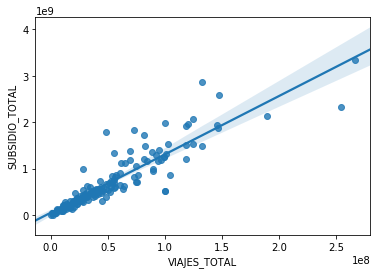

In [148]:
##sns.lmplot(x="VIAJES_TOTAL", y="SUBSIDIO_TOTAL", data=df)
viajes_subsidios = df_final2[['VIAJES_TOTAL', 'SUBSIDIO_TOTAL']]
viajes_subsidios.corr()
sns.regplot(x='VIAJES_TOTAL', y='SUBSIDIO_TOTAL', data= viajes_subsidios);

In [149]:
# Podemos asumir que la relación lineal es marcada entre TOTAL DE VIAJES y TOTAL SUBSIDIOS

### Quitamos Outliers

In [150]:
viajes_q98 = df_final2['VIAJES_TOTAL'].quantile(0.985)
print("el cuantil 0.985 de la feature 'VIAJES_TOTAL' es = " + str(viajes_q98))

el cuantil 0.985 de la feature 'VIAJES_TOTAL' es = 177164277.19999996


In [151]:
subsidios_q98 = df_final2.SUBSIDIO_TOTAL.quantile(0.985)
print("el cuantil 0.985 de la feature 'SUBSIDIO_TOTAL' es = " + str(subsidios_q98))

el cuantil 0.985 de la feature 'SUBSIDIO_TOTAL' es = 2507652948.2148


In [152]:
df_filt = df_final2.loc[(df_final2['VIAJES_TOTAL'] < viajes_q98) & (df_final2.SUBSIDIO_TOTAL < subsidios_q98)]

In [153]:
#Apenas se achica el dataset

df_filt.shape

(148, 21)

In [154]:
df_filt.head(3)

,RAZON_SOCIAL,CUIT,COMP_GASOIL_17,COMP_GASOIL_18,COMP_GASOIL_19,COMP_TARIFARIA_17,COMP_TARIFARIA_18,COMP_TARIFARIA_19,VIAJES_17,VIAJES_18,...,CANT_LINEAS,cant_provincias,cant_municipio,COMP_GASOIL_TOTAL,COMP_TARIFARIA_TOTAL,VIAJES_TOTAL,SUBSIDIO_TOTAL,TOTAL VIAJES NUEVO,NOMBRE_RESULTS_5,%atributo_social
0,17 DE AGOSTO S.A.,30-57190196-6,12068388.12,21968300.98,11150000.0,9.433652e+07,1.108401e+08,54953880.72,10957866.0,9793441.0,...,2.0,1,1,45186689.10,2.601305e+08,25243853.0,3.053172e+08,22986303.0,17 DE AGOSTO S.A.,0.244583
1,4 DE SEPTIEMBRE SATCP,30-54636615-0,21991005.30,37384755.88,18830000.0,1.475635e+08,1.772029e+08,94749364.73,15232576.0,14427177.0,...,1.0,1,1,78205761.18,4.195158e+08,36368662.0,4.977216e+08,33091909.0,4 DE SEPTIEMBRE SATCP,0.216854
2,5 DE AGOSTO SRL,30-57197043-7,3451091.53,5974264.98,3160000.0,2.518701e+07,3.256236e+07,17038997.68,3753067.0,3764309.0,...,1.0,1,1,12585356.51,7.478837e+07,9173730.0,8.737373e+07,8353014.0,5 DE AGOSTO SRL,0.367465


### Pulimos bien el dataframe final

In [155]:
# Eliminamos las que no necesitamos porque trabajaremos con los totales

df_filt = df_filt.drop(['COMP_GASOIL_17', 'COMP_GASOIL_18',
       'COMP_GASOIL_19', 'COMP_TARIFARIA_17', 'COMP_TARIFARIA_18',
       'COMP_TARIFARIA_19', 'VIAJES_17', 'VIAJES_18', 'VIAJES_19', 'NOMBRE_RESULTS_5'], axis=1)
print(df_final2.shape)
df_filt.head(10)

(153, 21)


,RAZON_SOCIAL,CUIT,CANT_LINEAS,cant_provincias,cant_municipio,COMP_GASOIL_TOTAL,COMP_TARIFARIA_TOTAL,VIAJES_TOTAL,SUBSIDIO_TOTAL,TOTAL VIAJES NUEVO,%atributo_social
0,17 DE AGOSTO S.A.,30-57190196-6,2.0,1,1,4.518669e+07,2.601305e+08,25243853.0,3.053172e+08,22986303.0,0.244583
1,4 DE SEPTIEMBRE SATCP,30-54636615-0,1.0,1,1,7.820576e+07,4.195158e+08,36368662.0,4.977216e+08,33091909.0,0.216854
2,5 DE AGOSTO SRL,30-57197043-7,1.0,1,1,1.258536e+07,7.478837e+07,9173730.0,8.737373e+07,8353014.0,0.367465
3,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,30-54641796-0,6.0,1,2,2.423588e+08,1.268755e+09,118339412.0,1.511114e+09,107629015.0,0.375451
4,ALMAFUERTE S.A.T.A.C.I.,33-54568440-9,2.0,1,1,7.636631e+07,3.663623e+08,29656463.0,4.427286e+08,27005596.0,0.249594
5,AUTOBUSES BUENOS AIRES SRL,30-71521580-9,4.0,1,1,6.883990e+07,4.068783e+08,44454519.0,4.757182e+08,40508894.0,0.372443
6,AZUL S.A. DE TRANSPORTE AUTOMOTOR,33-54625963-9,3.0,1,1,4.065065e+08,1.469986e+09,146332950.0,1.876492e+09,132567296.0,0.316601
7,BERNARDINO RIVADAVIA S.A.T.A.,30-54622810-6,3.0,1,1,9.896041e+07,5.908009e+08,55219238.0,6.897613e+08,50335568.0,0.260849
8,BUENOS AIRES BUS S.A.,30-70818819-7,1.0,1,1,3.145477e+07,1.793089e+08,10367677.0,2.107636e+08,9454620.0,0.331139
9,BUS DEL OESTE S.A.,30-70554911-3,1.0,1,1,4.059859e+07,2.328469e+08,12267595.0,2.734455e+08,11219309.0,0.283618


In [212]:
df_filt.head(120)

,RAZON_SOCIAL,CUIT,COMP_GASOIL_TOTAL,COMP_TARIFARIA_TOTAL,VIAJES_TOTAL,CANT_LINEAS,cant_provincias,cant_municipio,TOTAL VIAJES NUEVO,%atributo_social,SUBSIDIO_TOTAL
0,17 DE AGOSTO S.A.,30-57190196-6,4.51867e+07,2.6013e+08,2.52439e+07,2,1,1,2.29863e+07,0.244583,3.05317e+08
1,4 DE SEPTIEMBRE SATCP,30-54636615-0,7.82058e+07,4.19516e+08,3.63687e+07,1,1,1,3.30919e+07,0.216854,4.97722e+08
2,5 DE AGOSTO SRL,30-57197043-7,1.25854e+07,7.47884e+07,9.17373e+06,1,1,1,8.35301e+06,0.367465,8.73737e+07
3,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,30-54641796-0,2.42359e+08,1.26875e+09,1.18339e+08,6,1,2,1.07629e+08,0.375451,1.51111e+09
4,ALMAFUERTE S.A.T.A.C.I.,33-54568440-9,7.63663e+07,3.66362e+08,2.96565e+07,2,1,1,2.70056e+07,0.249594,4.42729e+08
5,AUTOBUSES BUENOS AIRES SRL,30-71521580-9,6.88399e+07,4.06878e+08,4.44545e+07,4,1,1,4.05089e+07,0.372443,4.75718e+08
6,AZUL S.A. DE TRANSPORTE AUTOMOTOR,33-54625963-9,4.06506e+08,1.46999e+09,1.46333e+08,3,1,1,1.32567e+08,0.316601,1.87649e+09
7,BERNARDINO RIVADAVIA S.A.T.A.,30-54622810-6,9.89604e+07,5.90801e+08,5.52192e+07,3,1,1,5.03356e+07,0.260849,6.89761e+08
8,BUENOS AIRES BUS S.A.,30-70818819-7,3.14548e+07,1.79309e+08,1.03677e+07,1,1,1,9.45462e+06,0.331139,2.10764e+08
9,BUS DEL OESTE S.A.,30-70554911-3,4.05986e+07,2.32847e+08,1.22676e+07,1,1,1,1.12193e+07,0.283618,2.73445e+08


In [214]:
##### Tenemos datos duplicados para la empresa 'SARGENTO CABRAL S.A. DE TRANSPORTES' Eliminamos una de las dos líneas
df_filt = df_filt.drop([111], axis=0)

### Exploramos un poco mas

In [215]:
#Tabla pivote para visualizar los subsidios asginados por empresa
subsidios_empresa=pd.pivot_table(df_filt,index=["RAZON_SOCIAL"],values=["SUBSIDIO_TOTAL"], aggfunc=np.sum).sort_values('SUBSIDIO_TOTAL',ascending=False)

In [216]:
subsidios_empresa

,SUBSIDIO_TOTAL
RAZON_SOCIAL,
DOTA SA DE TRANSPORTE AUTOMOTOR,2.065564e+09
TRANSPORTE IDEAL SAN JUSTO S.A.,1.985568e+09
TRANSPORTE LARRAZABAL CISA,1.961838e+09
GENERAL TOMAS GUIDO S.A.C.I.F.,1.947282e+09
EMPRESA SAN VICENTE S. A. DE TRANSPORTES,1.910108e+09
AZUL S.A. DE TRANSPORTE AUTOMOTOR,1.876492e+09
MICRO OMNIBUS NORTE SOCIEDAD ANONIMA,1.828623e+09
TRANSPORTES ATLANTIDA S.A.C.,1.795314e+09
EMPRESA DE TRANSPORTE TTE GRAL ROCA SA,1.720948e+09


Subsidios por empresa


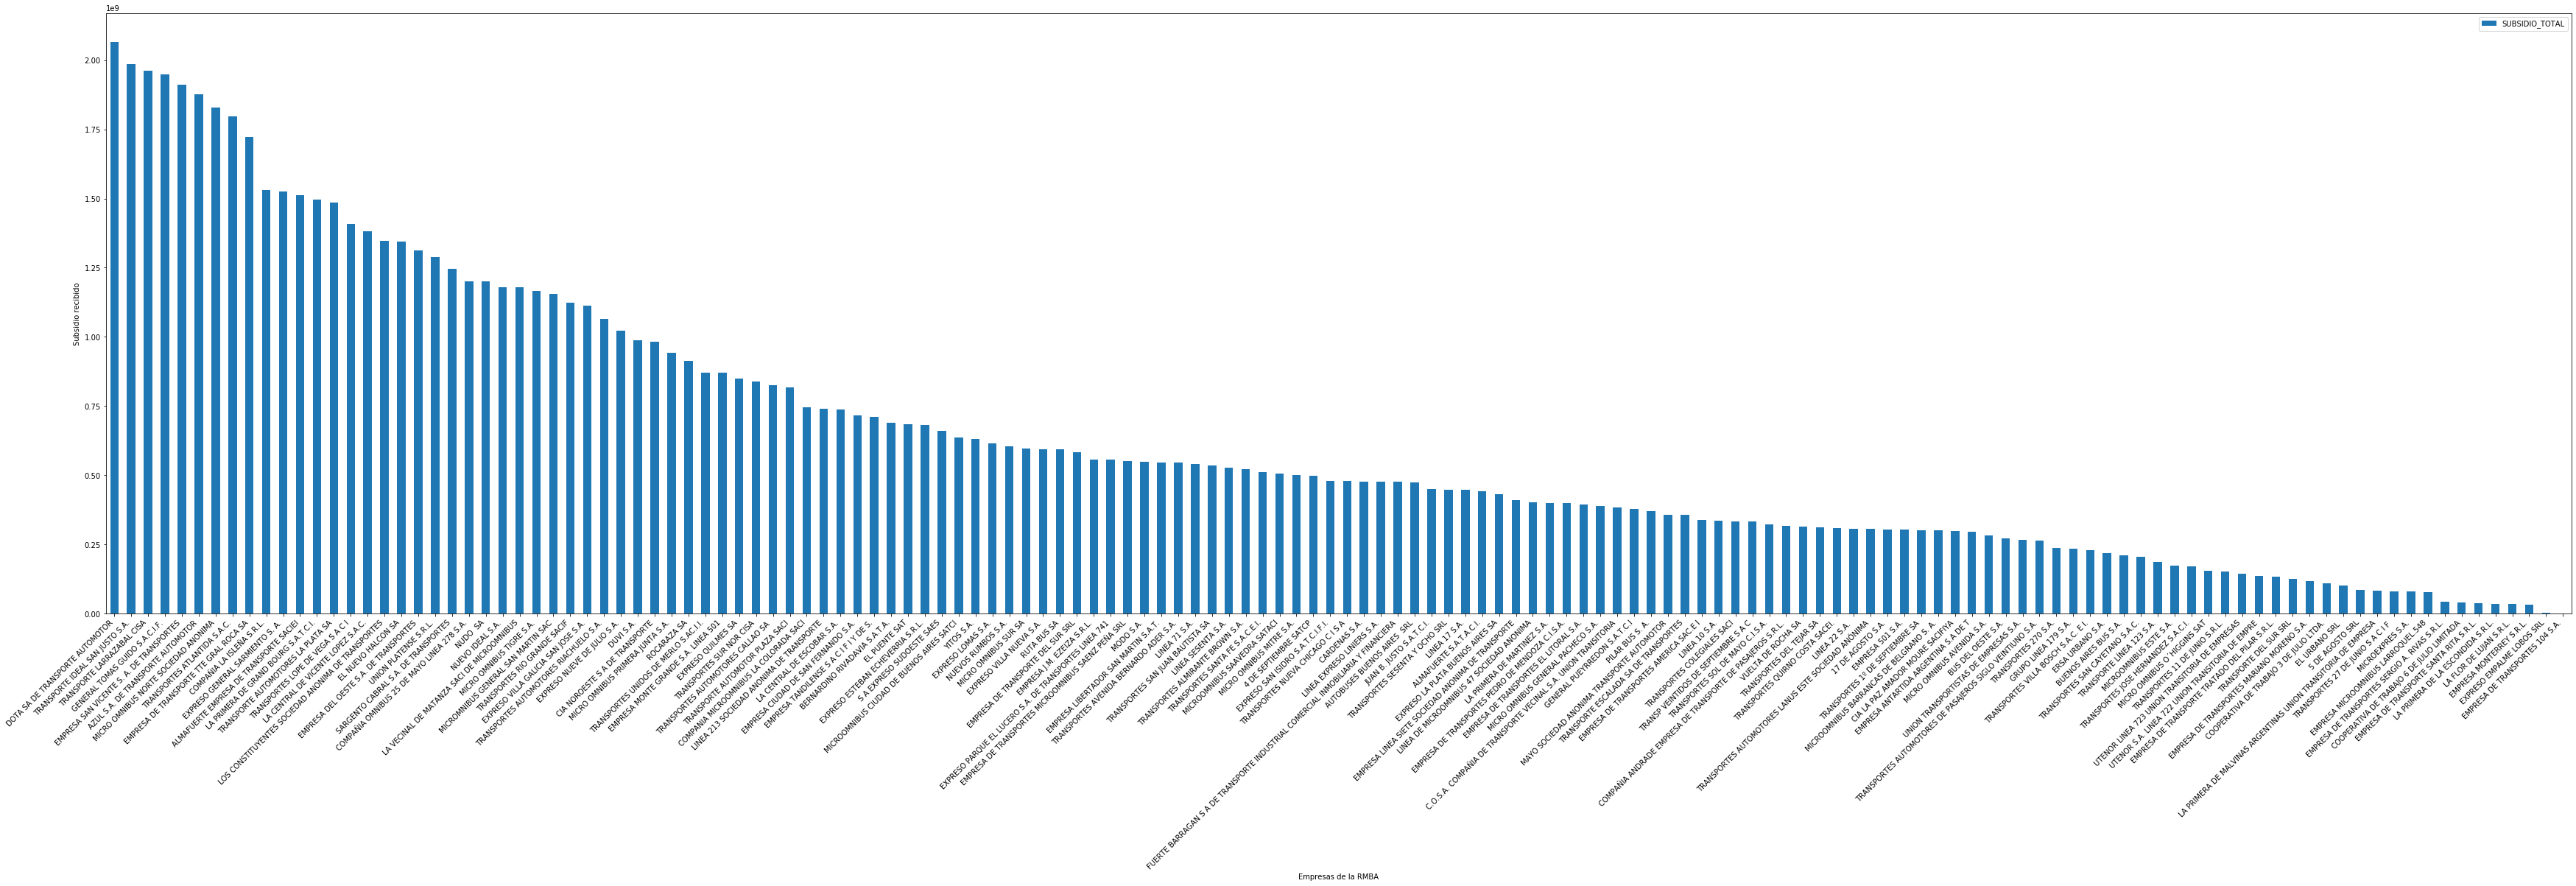

In [217]:
#Plot de subsidios por empresas 
g= subsidios_empresa.plot.bar(figsize=(60,15))
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")
plt.xlabel('Empresas de la RMBA') 
plt.ylabel('Subsidio recibido') 
print("Subsidios por empresa")

In [218]:
#Reordenamos las columnas para poder trabajar con los totales mas facilmente despues

df_filt=df_filt.T.reindex(['RAZON_SOCIAL','CUIT','COMP_GASOIL_TOTAL','COMP_TARIFARIA_TOTAL','VIAJES_TOTAL','CANT_LINEAS','cant_provincias','cant_municipio','TOTAL VIAJES NUEVO','%atributo_social', 'SUBSIDIO_TOTAL',]).T
df_filt.head(4)

,RAZON_SOCIAL,CUIT,COMP_GASOIL_TOTAL,COMP_TARIFARIA_TOTAL,VIAJES_TOTAL,CANT_LINEAS,cant_provincias,cant_municipio,TOTAL VIAJES NUEVO,%atributo_social,SUBSIDIO_TOTAL
0,17 DE AGOSTO S.A.,30-57190196-6,4.51867e+07,2.6013e+08,2.52439e+07,2,1,1,2.29863e+07,0.244583,3.05317e+08
1,4 DE SEPTIEMBRE SATCP,30-54636615-0,7.82058e+07,4.19516e+08,3.63687e+07,1,1,1,3.30919e+07,0.216854,4.97722e+08
2,5 DE AGOSTO SRL,30-57197043-7,1.25854e+07,7.47884e+07,9.17373e+06,1,1,1,8.35301e+06,0.367465,8.73737e+07
3,ALMAFUERTE EMPRESA DE TRANSPORTE SACIEI,30-54641796-0,2.42359e+08,1.26875e+09,1.18339e+08,6,1,2,1.07629e+08,0.375451,1.51111e+09


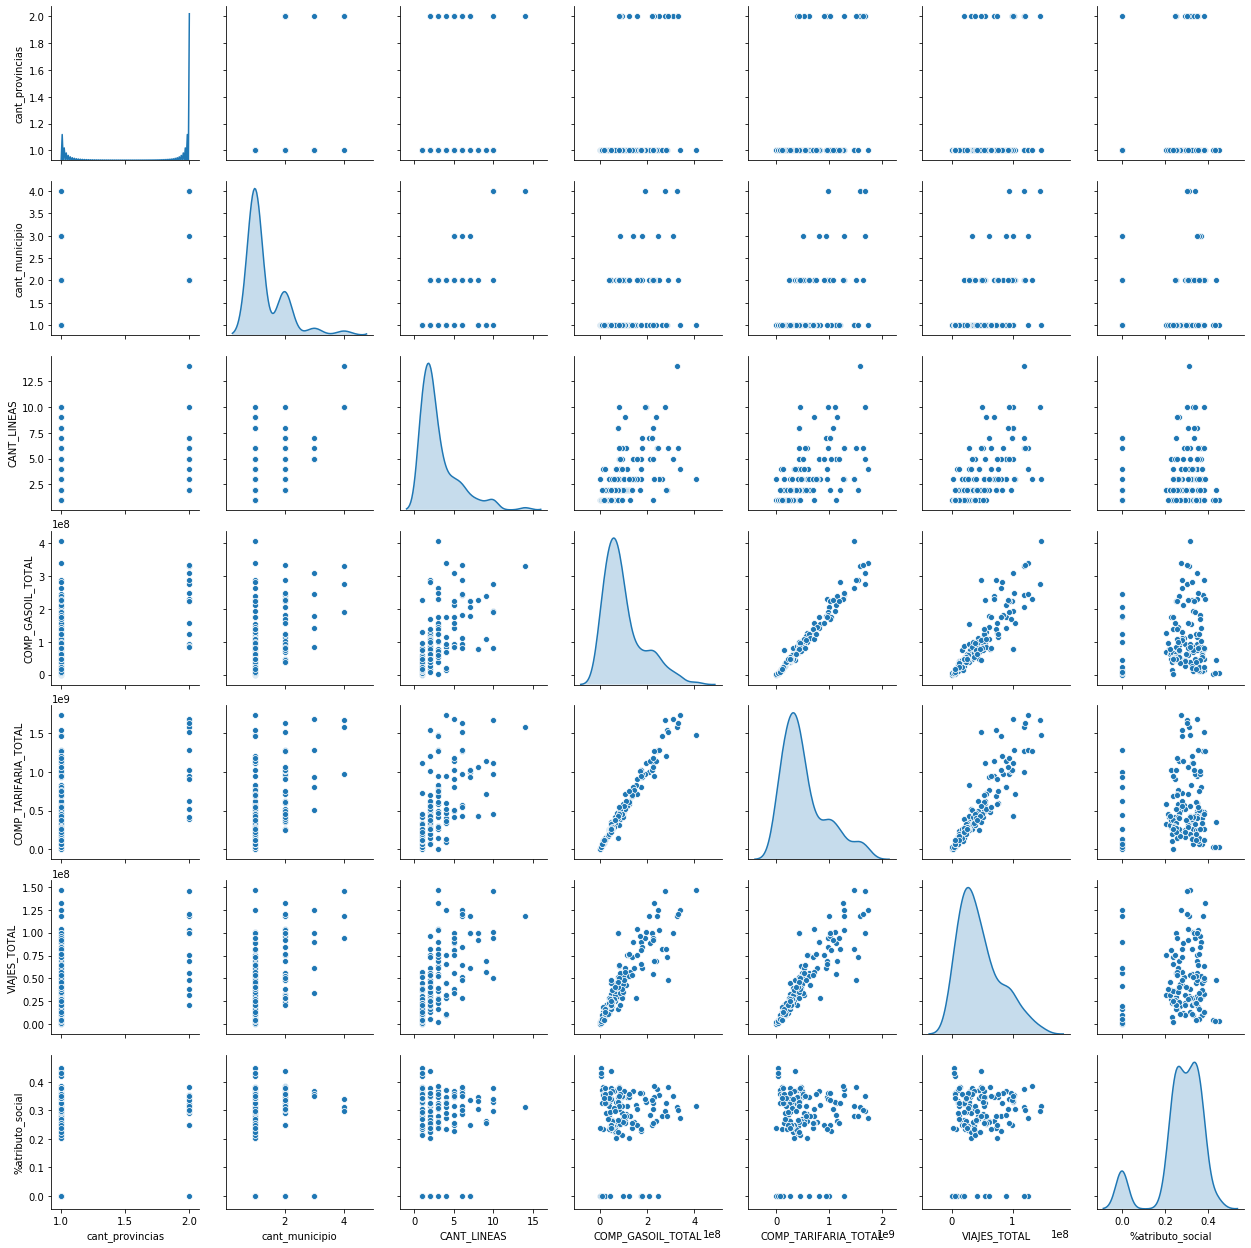

In [161]:
sns.pairplot(df_filt[["cant_provincias","cant_municipio","CANT_LINEAS", "COMP_GASOIL_TOTAL", "COMP_TARIFARIA_TOTAL", "VIAJES_TOTAL", "%atributo_social"]], diag_kind="kde")

### Entrenaremos modelos de regresion

In [162]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

### Definimos las variables x e y
###### Nuestro objetivo será predecir el Subsidio Total, desde:
- Viajes totales
- Cantidad de lineas que posee esa empresa
- Cantidad de provincias en las que opera
- Cantidad de municipios en los que opera
- % boletos de Atributo Social

In [219]:
x = df_filt.iloc[:,5:10]

In [220]:
x.head()

,CANT_LINEAS,cant_provincias,cant_municipio,TOTAL VIAJES NUEVO,%atributo_social
0,2,1,1,2.29863e+07,0.244583
1,1,1,1,3.30919e+07,0.216854
2,1,1,1,8.35301e+06,0.367465
3,6,1,2,1.07629e+08,0.375451
4,2,1,1,2.70056e+07,0.249594


In [221]:
x.shape

(147, 5)

In [222]:
y = df_filt.iloc[:,10:11]

In [223]:
y.head()

,SUBSIDIO_TOTAL
0,3.05317e+08
1,4.97722e+08
2,8.73737e+07
3,1.51111e+09
4,4.42729e+08


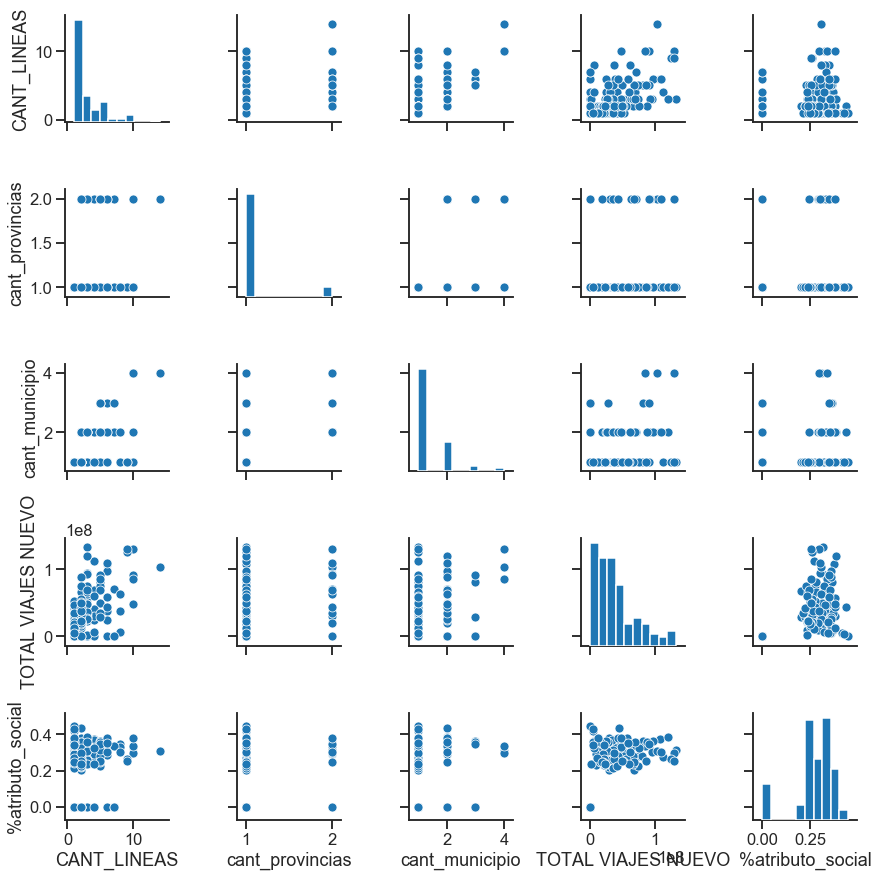

In [224]:
sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")

sns.pairplot(x)
plt.show()

#### Dividimos nuestros datos en Train y Test

In [225]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, random_state=4)

In [226]:
xtrain.shape

(132, 5)

In [227]:
xtest.shape

(15, 5)

In [228]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(xtrain)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [229]:
xtrain_scal = scaler.transform(xtrain)  
# para cada feature imprimimos la media y el desvio standard obtenido. Ver que media = 0 y stdev = 1.
print(xtrain_scal.mean(axis=0))
print(xtrain_scal.std(axis=0))

[3.36431220e-17 2.82602224e-16 4.20539024e-17 7.31737903e-17
 2.82602224e-16]
[1. 1. 1. 1. 1.]


In [230]:
xtest_scal=scaler.transform(xtest)
print(xtest_scal.mean(axis=0))
print(xtest_scal.std(axis=0))

[-0.02628963 -0.0843274   0.36998743 -0.1329735   0.18001703]
[1.24719296 0.8676917  1.76119444 1.04303467 0.86586221]


### 1. Entrenamos Modelo de Linear Regression

In [231]:
# 1) definimos el modelo de Regresión Lineal bajo el nombre "lr"
lr = LinearRegression()

In [232]:
# 2) Ajustamos el modelo de regresion lineal utilizando el set de train, tanto las features X como las samples Y
lr.fit(xtrain_scal, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [233]:
# 3) Obtenemos las predicciones que realiza el modelo con las muestras de test, sin mostrarle las labels (Ytest)
# las predicciones las guardamos en el vector "ypred"
ypred = lr.predict(xtest_scal)

In [234]:
np.shape(ypred)

(15, 1)

In [235]:
from sklearn import metrics
print('Multiple Linear Regression')
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))
print('MSE:', metrics.mean_squared_error(ytest, ypred))  
print('MAE:', metrics.mean_absolute_error(ytest, ypred))  

Multiple Linear Regression
RMSE: 188487529.05001065
MSE: 3.5527548607378604e+16
MAE: 133548592.92865454


In [236]:
x.columns

Index(['CANT_LINEAS', 'cant_provincias', 'cant_municipio',
       'TOTAL VIAJES NUEVO', '%atributo_social'],
      dtype='object')

In [237]:
print(f'alpha = {lr.intercept_}')
print(f'betas = {lr.coef_}')

alpha = [6.46946925e+08]
betas = [[ 4.47529200e+07  6.91676306e+07  7.48578701e+07  3.62082770e+08
  -1.06240820e+08]]


In [238]:
print('Training score: {}'.format(lr.score(xtrain_scal, ytrain)))
print('Test score: {}'.format(lr.score(xtest_scal, ytest)))

Training score: 0.7104118795143279
Test score: 0.8466171074933959


In [239]:
# El score da parecido para train y para test, lo que indica que no hay overfitting

### 1.1 Aplicamos Lasso Regularization

In [240]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [241]:
steps = [('scalar', StandardScaler()),('poly', PolynomialFeatures(degree=2)),('model', Lasso(alpha=0.1, fit_intercept=True))]

In [242]:
lasso_pipe = Pipeline(steps)

In [243]:
lasso_pipe.fit(xtrain_scal, ytrain)

Pipeline(memory=None,
         steps=[('scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 Lasso(alpha=0.1, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [244]:
print('Training score: {}'.format(lasso_pipe.score(xtrain_scal, ytrain)))
print('Test score: {}'.format(lasso_pipe.score(xtest_scal, ytest)))

Training score: 0.8117876554268308
Test score: 0.8761028517428765


In [245]:
ypred_LASSO = lasso_pipe.predict(xtest_scal)

In [246]:
from sklearn import metrics
print('Lasso Regularization')
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, ypred_LASSO)))
print('MSE:', metrics.mean_squared_error(ytest, ypred_LASSO))  
print('MAE:', metrics.mean_absolute_error(ytest, ypred_LASSO))  

Lasso Regularization
RMSE: 169404450.0677472
MSE: 2.869786770275586e+16
MAE: 115017129.18457222


In [247]:
# la Regularizacion con Lasso no mejora la performance

### 1.2 Entrenamos Modelo de Linear Regression con CrossValidation

In [248]:
parameters = {'fit_intercept':('True', 'False'), 'normalize':('True', 'False'), 'copy_X':('True', 'False')}

In [249]:
grid = GridSearchCV(lr,parameters, cv=5)

In [250]:
grid.fit(xtrain_scal, ytrain)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'copy_X': ('True', 'False'),
                         'fit_intercept': ('True', 'False'),
                         'normalize': ('True', 'False')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [251]:
print("r2 / variance : ", grid.best_score_)

r2 / variance :  0.6625166410261775


In [252]:
print("Residual sum of squares: %.2f" % np.mean((grid.predict(xtest_scal) - ytest) ** 2))

Residual sum of squares: 35527548607378556.00


In [253]:
ypred_train_lr = lr.predict(xtrain_scal)
ypred_train_lr

array([[ 1.04338840e+09],
       [ 4.34635618e+08],
       [ 5.62852974e+08],
       [ 8.38456547e+08],
       [ 9.68242342e+08],
       [ 4.94141158e+08],
       [ 3.76396999e+08],
       [ 3.99504730e+08],
       [ 7.30921518e+08],
       [ 1.44209442e+09],
       [ 5.58762000e+08],
       [ 5.85861153e+08],
       [ 9.35459521e+08],
       [ 3.89700997e+08],
       [ 5.34034629e+08],
       [ 1.82117690e+08],
       [ 4.23617564e+08],
       [ 3.95809872e+08],
       [ 9.55040642e+08],
       [ 1.91365948e+08],
       [ 1.07148542e+09],
       [ 5.28995595e+08],
       [ 7.24965370e+08],
       [ 3.23963528e+08],
       [ 4.16890075e+08],
       [ 4.15222745e+08],
       [ 4.80786620e+08],
       [ 9.75762515e+08],
       [ 6.97817873e+08],
       [ 1.00010593e+09],
       [ 2.09355636e+08],
       [ 3.92826654e+08],
       [ 2.23562211e+08],
       [ 7.05365634e+07],
       [ 1.53633424e+08],
       [ 1.35136565e+09],
       [ 1.76020087e+09],
       [ 5.56878804e+08],
       [ 1.6

In [254]:
# realizamos predicciones de Y utilizando los datos X de test con el modelo ya entrenado.
ypred_lr = lr.predict(xtest_scal)
ypred_lr

array([[5.49575428e+08],
       [5.19134480e+08],
       [2.36140463e+09],
       [3.76396999e+08],
       [2.41181668e+08],
       [5.10089937e+08],
       [2.14169685e+08],
       [1.56661741e+09],
       [5.79543893e+08],
       [3.32966840e+08],
       [4.66985062e+08],
       [7.24569241e+08],
       [3.73453978e+08],
       [9.91171095e+07],
       [9.02170592e+07]])

In [255]:
from sklearn import metrics
print('Linear Regression with gridsearchCV')
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, ypred_lr)))
print('MSE:', metrics.mean_squared_error(ytest, ypred_lr))  
print('MAE:', metrics.mean_absolute_error(ytest, ypred_lr))  

Linear Regression with gridsearchCV
RMSE: 188487529.05001065
MSE: 3.5527548607378604e+16
MAE: 133548592.92865454


In [256]:
# Resultados iguales que la Linear Regression

### 1.2 Probamos un modelo regresor KNN Regression

In [257]:
# creamos nuestro modelo de KNN que se llama neigh
neigh = KNeighborsRegressor(weights = "distance")

In [258]:
# creamos un array de 5 posiciones con los valores del hiperparametro "k" que queremos probar por gridsearch
parameters_k = np.arange(20,31,5)
parameters_k

array([20, 25, 30])

In [259]:
# creamos un diccionario "tuned_params" con los parametros que quiero optimizar, e indicamos qué valores de ese parametro queremos probar
parameters_knn = [{'n_neighbors': parameters_k}]

In [260]:
# indicamos la cantidad de folds que queremos utilizar en nuestro training para cross validation
n_folds = 5

In [261]:
# creamos un modelo que contiene, el regresor a utilizar, la grilla de parametros a probar
# y la cantidad de folds para el cross validation
regresor_neigh = GridSearchCV(neigh, parameters_knn, refit = True, cv=n_folds, verbose=True)

In [262]:
# entrenamos modelo regresor con nuestro set de entrenamiento (tanto Xtrain como Ytrain)
regresor_neigh.fit(xtrain_scal, ytrain)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='distance'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': array([20, 25, 30])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [263]:
# observamos cual fue el parametro que "gano" en el cross validation y grid search
regresor_neigh.best_params_

{'n_neighbors': 20}

In [264]:
# calculamos el accuracy del modelo
regresor_neigh.best_score_

0.6008449667029677

In [265]:
# realizamos con nuestro modelo entrenado, predicciones de Y (ypred) utilizando solo xtest
ypred2 = regresor_neigh.predict(xtest_scal)
ypred2

array([[5.33881590e+08],
       [5.45709660e+08],
       [1.27620166e+09],
       [5.79687927e+07],
       [3.07518842e+08],
       [4.49078596e+08],
       [2.14971022e+08],
       [1.02390212e+09],
       [7.63240081e+08],
       [3.42468191e+08],
       [4.76850047e+08],
       [6.06737261e+08],
       [3.60854796e+08],
       [1.44847746e+08],
       [2.05707889e+08]])

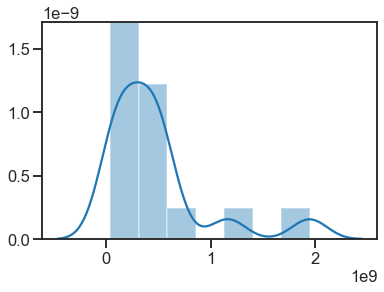

In [266]:
# visualizamos el rango de valores de las etiquetas de test
sns.distplot(ytest)
plt.show()

In [267]:
from sklearn import metrics
print('KNN with gridsearchCV')
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, ypred2)))
print('MSE:', metrics.mean_squared_error(ytest, ypred2))  
print('MAE:', metrics.mean_absolute_error(ytest, ypred2))  

KNN with gridsearchCV
RMSE: 206786962.99371472
MSE: 4.276084806416394e+16
MAE: 131060732.03337501


In [268]:
print('Training score: {}'.format(regresor_neigh.score(xtrain_scal, ytrain)))
print('Test score: {}'.format(regresor_neigh.score(xtest_scal, ytest)))

Training score: 0.9962318949036818
Test score: 0.8153888230623738


In [269]:
### Training score = 1 -> Señal de Overfitting

### 1.3 Probamos un modelo regresor Support Vector Regression

In [270]:
# creamos un modelo de SVR
svreg = SVR()

In [271]:
# cantidad de folds para el cross validation
n_folds = 5

In [272]:
# Distintos hiper parametros a probar en grid search 
parameters_svr_lin = [{'kernel':['linear'], 'C': [1, 100]}]

In [273]:
regresor_svr = GridSearchCV(svreg, parameters_svr_lin, cv=n_folds, verbose=True)

In [274]:
# entrenamos modelo regresor con nuestro set de entrenamiento (tanto Xtrain como Ytrain)

regresor_svr.fit(xtrain_scal, ytrain)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 100], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [275]:
# vemos cuales son los mejores parametros luego del cross validation
regresor_svr.best_params_

{'C': 100, 'kernel': 'linear'}

In [276]:
# Calculamos el accuracy del modelo
regresor_svr.best_score_

-0.0966980622255813

In [277]:
# realizo con nuestro modelo entrenado, predicciones de Y (ypred) utilizando solo xtest
ypred3 = regresor_svr.predict(xtest_scal)
ypred3

array([5.11147654e+08, 5.11154656e+08, 5.11229337e+08, 5.11134559e+08,
       5.11137488e+08, 5.11146451e+08, 5.11139920e+08, 5.11208245e+08,
       5.11147550e+08, 5.11142882e+08, 5.11155262e+08, 5.11162072e+08,
       5.11143675e+08, 5.11137722e+08, 5.11139770e+08])

In [278]:
from sklearn import metrics
print('SVR LINEAR with gridsearchCV')
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, ypred3)))
print('MSE:', metrics.mean_squared_error(ytest, ypred3))  
print('MAE:', metrics.mean_absolute_error(ytest, ypred3))  

SVR LINEAR with gridsearchCV
RMSE: 483131971.66916084
MSE: 2.334165020489308e+17
MAE: 332540111.7851604


In [279]:
print('Training score: {}'.format(regresor_svr.score(xtrain_scal, ytrain)))
print('Test score: {}'.format(regresor_svr.score(xtest_scal, ytest)))

Training score: -0.0739786533071618
Test score: -0.007727795652162196


In [280]:
### El score del SVR da muy mal